In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from HelperFcns import mean_daily_features
from scipy.stats import pearsonr, entropy, iqr, spearmanr
from scipy.stats import shapiro, ttest_ind, ttest_rel, mannwhitneyu, wilcoxon
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('paper',font_scale=1.8)
sns.despine()
import itertools
%load_ext autoreload
%autoreload 2
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})

<Figure size 432x288 with 0 Axes>

## Home data analysis

In [28]:
Datahome = pd.read_csv('../Data/GPSandClinicalData_Home.csv')

In [29]:
Datahome['Duration_Wearing']=Datahome['Duration']*Datahome['Wear Frac']

In [30]:
Datahome.head()

,Wear Frac,Duration,Mean Speed,SubjID,NewBrace,LocID,Steps,Steps per Hour,Steps per Hour Wear,Date,Cadence,Age,Diagnosis,BaselineYrs,6mwt,10mwt_ss,10mwt_fast,Duration_Wearing
0,0.033473,2.652778,0.076119,CBR21,1,0,30,11.308901,337.853403,2016-08-18,0.333333,65,poliomyelitis,60.0,231.93,0.69,0.85,0.088796
1,0.000000,18.044444,0.037787,CBR21,1,0,0,0.000000,NaN,2016-08-19,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85,0.000000
2,0.000000,4.041667,0.063728,CBR21,1,0,0,0.000000,NaN,2016-08-19,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85,0.000000
3,0.000000,12.708333,0.046796,CBR21,1,0,0,0.000000,NaN,2016-08-20,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85,0.000000
4,0.000000,1.600000,0.212844,CBR21,1,0,0,0.000000,NaN,2016-08-20,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85,0.000000


In [31]:
Datahome.columns

Index(['Wear Frac', 'Duration', 'Mean Speed', 'SubjID', 'NewBrace', 'LocID',
       'Steps', 'Steps per Hour', 'Steps per Hour Wear', 'Date', 'Cadence',
       'Age', 'Diagnosis', 'BaselineYrs', '6mwt', '10mwt_ss', '10mwt_fast',
       'Duration_Wearing'],
      dtype='object')

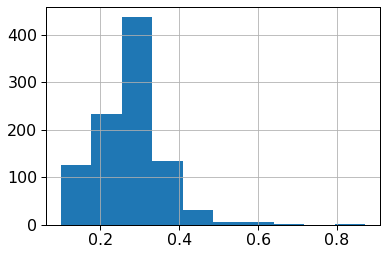

In [32]:
Datahome['Cadence'].hist()

In [33]:
#Mean features across days per subject
homedur = mean_daily_features(Datahome)

/Users/luca/Projects/CbraceGPS/CbrAnalysis/HelperFcns.py:16: RuntimeWarning: Mean of empty slice
  cadence = np.nanmean(d['Cadence'])
/Users/luca/Projects/CbraceGPS/CbrAnalysis/HelperFcns.py:31: RuntimeWarning: Mean of empty slice
  meandailycadence = np.nanmean(dailycadence)


## Home mean features across days per subject

In [8]:
homedur.head()

,SubjID,Duration_Mean,Duration_Median,Wear Fraction,NewBrace,6mwt,10mwt_ss,Steps,Cadence,Daily Duration,Age,BaselineYrs
0,CBR21,6.799006,6.284861,0.023871,1,231.93,0.69,32.200000,0.206293,17.071111,65.0,60.0
1,CBR30,5.065320,3.038611,0.626585,1,452.17,1.20,1706.117647,0.281388,13.980556,55.0,37.0
2,CBR22,0.251551,0.185833,0.825910,1,332.61,1.00,105.583333,0.356069,0.222778,28.0,2.0
3,CBR27,21.142396,23.997222,0.004652,1,78.82,0.33,15.062500,0.194220,23.997222,72.0,70.0
4,CBR26,11.163413,9.988889,0.204154,1,512.14,1.15,329.650794,0.327492,21.665000,52.0,0.5


In [9]:
# plt.figure(figsize=(16,5))
# sns.boxplot(data=Datahome,x='SubjID',y='Duration_Wearing',hue='NewBrace')
# plt.title('Usage time at Home')

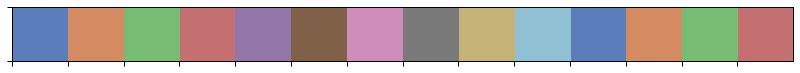

In [10]:
sns.palplot(sns.color_palette("muted", n_colors=14, desat=.7))

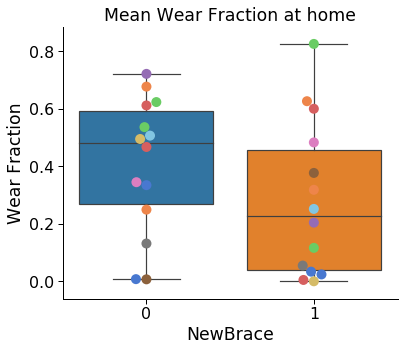

In [11]:
plt.figure(figsize=(6,5))
sns.boxplot(x='NewBrace', y='Wear Fraction',data=homedur)
ax = sns.swarmplot(x='NewBrace', y='Wear Fraction', hue='SubjID', data=homedur, palette='muted',size=10)
ax.set_title('Mean Wear Fraction at home')
sns.despine()
ax.get_legend().remove()

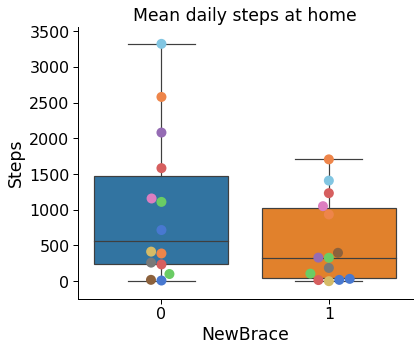

In [12]:
plt.figure(figsize=(6,5))
sns.boxplot(x='NewBrace', y='Steps',data=homedur)
ax = sns.swarmplot(x='NewBrace', y='Steps', hue='SubjID', data=homedur, palette='muted',size=10)
ax.set_title('Mean daily steps at home')
sns.despine()
ax.get_legend().remove()

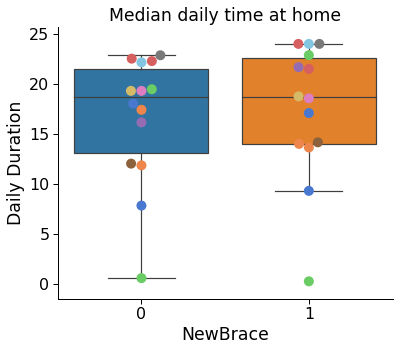

In [13]:
plt.figure(figsize=(6,5))
sns.boxplot(x='NewBrace', y='Daily Duration',data=homedur)
ax = sns.swarmplot(x='NewBrace', y='Daily Duration', hue='SubjID', data=homedur, palette='muted',size=10)
ax.set_title('Median daily time at home')
sns.despine()
ax.get_legend().remove()

## Community data analysis

In [34]:
# Data = pd.read_csv('GPSData.csv')
Data = pd.read_csv('../Data/GPSandClinicalData.csv')

In [35]:
Data.head()

,Wear Frac,DestinationType,Distance,Duration,Mean Speed,TripDuration,Relative_Freq,Relative_Duration,SubjID,NewBrace,...,Steps per Hour,Steps per Hour Wear,Date,Cadence,Age,Diagnosis,BaselineYrs,6mwt,10mwt_ss,10mwt_fast
0,0.015000,Res,12.229512,2.772222,0.215601,NaN,0.014925,0.021452,CBR21,1,...,0.0,0.0,2016-08-18,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85
1,0.063091,Inst,6.302016,1.758333,0.230411,NaN,0.014925,0.013607,CBR21,1,...,0.0,0.0,2016-08-18,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85
2,0.000000,Com,5.095353,1.016389,0.591493,NaN,0.014925,0.007865,CBR21,1,...,0.0,NaN,2016-08-19,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85
3,0.000000,Com,5.172335,0.366111,1.607549,NaN,0.029851,0.004252,CBR21,1,...,0.0,NaN,2016-08-19,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85
4,0.000000,Com,2.871296,0.052778,4.483316,NaN,0.044776,0.001827,CBR21,1,...,0.0,NaN,2016-08-19,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85


In [36]:
Data.columns


Index(['Wear Frac', 'DestinationType', 'Distance', 'Duration', 'Mean Speed',
       'TripDuration', 'Relative_Freq', 'Relative_Duration', 'SubjID',
       'NewBrace', 'Steps', 'Steps per Hour', 'Steps per Hour Wear', 'Date',
       'Cadence', 'Age', 'Diagnosis', 'BaselineYrs', '6mwt', '10mwt_ss',
       '10mwt_fast'],
      dtype='object')

In [37]:
#compute mean duration/day feature across days for each participant
dur = mean_daily_features(Data)

/Users/luca/Projects/CbraceGPS/CbrAnalysis/HelperFcns.py:16: RuntimeWarning: Mean of empty slice
  cadence = np.nanmean(d['Cadence'])
/Users/luca/Projects/CbraceGPS/CbrAnalysis/HelperFcns.py:31: RuntimeWarning: Mean of empty slice
  meandailycadence = np.nanmean(dailycadence)


[Text(0, 0, 'CBR21'),
 Text(0, 0, 'CBR30'),
 Text(0, 0, 'CBR22'),
 Text(0, 0, 'CBR27'),
 Text(0, 0, 'CBR26'),
 Text(0, 0, 'CBR11'),
 Text(0, 0, 'CBR16'),
 Text(0, 0, 'CBR28'),
 Text(0, 0, 'CBR15'),
 Text(0, 0, 'CBR25'),
 Text(0, 0, 'CBR19'),
 Text(0, 0, 'CBR08'),
 Text(0, 0, 'CBR24'),
 Text(0, 0, 'CBR31')]

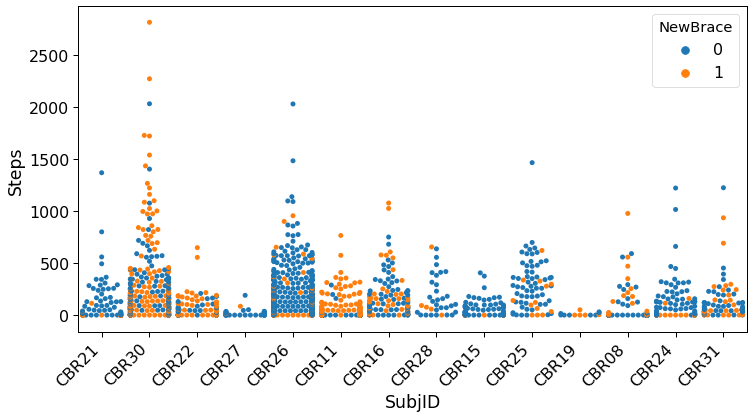

In [45]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
sns.swarmplot(x='SubjID',y='Steps',data=Data, hue='NewBrace', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

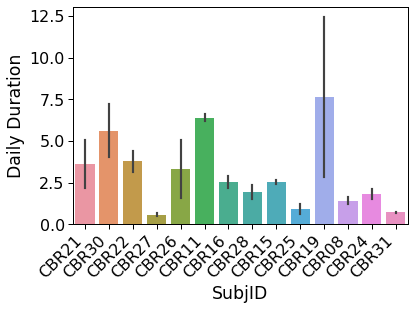

In [46]:
ax = sns.barplot(x='SubjID',y='Daily Duration',data=dur)
a\
x=ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [50]:
dur.head()

,SubjID,Duration_Mean,Duration_Median,Wear Fraction,NewBrace,6mwt,10mwt_ss,Steps,Cadence,Daily Duration,Age,BaselineYrs
0,CBR21,1.928765,0.661944,0.038358,1,231.93,0.69,6.954545,0.353914,5.095694,65.0,60.0
1,CBR30,1.001469,0.411111,0.955487,1,452.17,1.20,1918.230769,0.331321,7.233611,55.0,37.0
2,CBR22,2.207157,0.511111,0.621796,1,332.61,1.00,288.058824,0.265878,3.136111,28.0,2.0
3,CBR27,0.491389,0.491389,1.000000,1,133.60,0.46,51.000000,0.202273,0.491389,72.0,70.0
4,CBR26,0.536108,0.224167,0.945755,1,512.14,1.15,543.315789,0.326924,1.600000,52.0,0.5


Text(0.5, 0, 'Cadence [steps/s]')

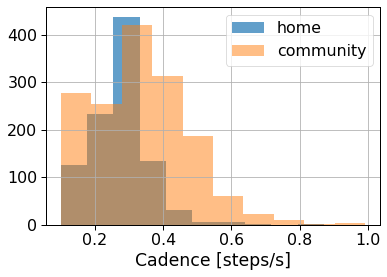

In [42]:
Datahome.Cadence.hist(alpha=0.7)
Data.Cadence.hist(alpha=.5)
plt.legend(['home','community'])
plt.xlabel('Cadence [steps/s]')

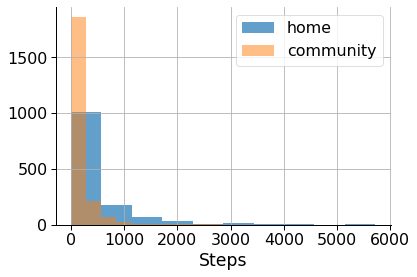

In [43]:
Datahome.Steps.hist(alpha=0.7)
Data.Steps.hist(alpha=.5)
plt.legend(['home','community'])
plt.xlabel('Steps')
sns.despine()

## Community mean features across days per subject

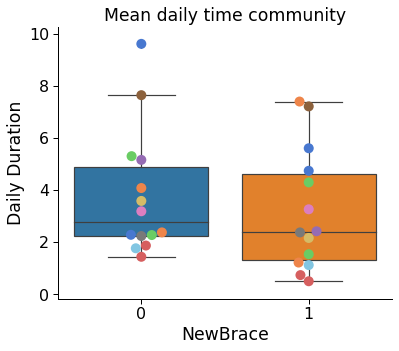

In [20]:
plt.figure(figsize=(6,5))
sns.boxplot(x='NewBrace', y='Daily Duration',data=dur)
ax = sns.swarmplot(x='NewBrace', y='Daily Duration', hue='SubjID', data=dur, palette='muted',size=10)
ax.set_title('Mean daily time community')
sns.despine()
ax.get_legend().remove()

In [21]:
# fig = plt.figure(figsize=(18,6))
# fig.add_subplot(121)
# ax = sns.boxplot(x='SubjID', y='Steps', hue='NewBrace', data=Datahome)
# ax=plt.xticks(rotation=90)
# plt.title('Home')
# sns.despine()
# fig.add_subplot(122)
# ax = sns.boxplot(x='SubjID', y='Steps', hue='NewBrace', data=Data)
# plt.title('Community')
# ax=plt.xticks(rotation=90)
# sns.despine()


In [22]:
Data.columns

Index(['Wear Frac', 'DestinationType', 'Distance', 'Duration', 'Mean Speed',
       'TripDuration', 'Relative_Freq', 'Relative_Duration', 'SubjID',
       'NewBrace', 'Steps', 'Steps per Hour', 'Steps per Hour Wear', 'Date',
       'Cadence', 'Age', 'Diagnosis', 'BaselineYrs', '6mwt', '10mwt_ss',
       '10mwt_fast'],
      dtype='object')

In [23]:
# Data['Duration_Wearing']=Data['Duration']*Data['Wear Frac']
# plt.figure(figsize=(16,5))
# sns.boxplot(data=Data ,x='SubjID',y='Duration_Wearing',hue='NewBrace')

In [24]:
subjmobility=dur['Daily Duration']/homedur['Daily Duration']

In [25]:
dur.head()

,SubjID,Duration_Mean,Duration_Median,Wear Fraction,NewBrace,6mwt,10mwt_ss,Steps,Cadence,Daily Duration,Age,BaselineYrs
0,CBR21,1.928765,0.661944,0.033078,1,231.93,0.69,5.776119,0.362795,5.595833,65.0,60.0
1,CBR30,1.001469,0.411111,0.938007,1,452.17,1.20,2169.580460,0.322353,7.388889,55.0,37.0
2,CBR22,2.207157,0.511111,0.845676,1,332.61,1.00,630.843137,0.284543,4.285000,28.0,2.0
3,CBR27,0.491389,0.491389,1.000000,1,133.60,0.46,51.000000,0.202273,0.491389,72.0,70.0
4,CBR26,0.536108,0.224167,0.974758,1,512.14,1.15,677.558442,0.361475,2.408611,52.0,0.5


## Combined Home-Community analysis (Deprecated)

In [26]:
# fig, ax = plt.subplots(1,2, figsize=(18,6), sharey=True)
# ax = ax.ravel()
# sns.boxplot(x='SubjID', y='Steps', hue='NewBrace', data=Datahome, ax=ax[0])
# locs, labels = plt.xticks()
# ax[0].set_xticklabels(labels,rotation=90)
# ax[0].set_title('Home')
# sns.despine()
# sns.boxplot(x='SubjID', y='Steps', hue='NewBrace', data=Data, ax=ax[1])
# ax[1].set_title('Community')
# plt.xticks(rotation=90)
# sns.despine()

In [65]:
#summary plot
homedur['Loc']='Home'
dur['Loc']='Community'
durdata = pd.concat([homedur,dur])

In [66]:
# durdata

In [67]:
print('MedianHome Baseline = %.2f h'%homedur[homedur['NewBrace']==0]['Duration_Median'].median())
print('MedianHome Cbrace = %.2f h'%homedur[homedur['NewBrace']==1]['Duration_Median'].median())
print('MedianComm Baseline = %.2f h'%dur[dur['NewBrace']==0]['Duration_Median'].median())
print('MedianComm Cbrace = %.2f h'%dur[dur['NewBrace']==1]['Duration_Median'].median())

MedianHome Baseline = 7.62 h
MedianHome Cbrace = 9.27 h
MedianComm Baseline = 0.31 h
MedianComm Cbrace = 0.38 h


In [68]:
# print('MedianHome difference = %.2f h'%(homedur[homedur['NewBrace']==1]['Duration_Median'].median() - 
#      homedur[homedur['NewBrace']==0]['Duration_Median'].median()))

# print('MedianComm difference = %.2f h'%(homedur[homedur['NewBrace']==1]['Duration_Median'].median() - 
#      homedur[homedur['NewBrace']==0]['Duration_Median'].median()))


In [69]:
#comparison of wearfraction
A = dur.query('NewBrace==0')[['Wear Fraction','SubjID']]
A.index = A.SubjID
A.drop('SubjID',axis=1, inplace=True)
B = dur.query('NewBrace==1')[['Wear Fraction','SubjID']]
B.index = B.SubjID
B.drop('SubjID',axis=1, inplace=True)
A.rename(columns={'Wear Fraction':'WF-Personal'}, inplace=True)
B.rename(columns={'Wear Fraction':'WF-Cbrace'}, inplace=True)
AB = pd.concat((A,B),axis=1)
AB['delta'] = AB.iloc[:,1]-AB.iloc[:,0]
AB.sort_values('delta')

#add column on deltaUse
dur.index = dur['SubjID']
dur['delta'] = AB['delta']

Text(0, 0.5, 'Daily Duration [h]')

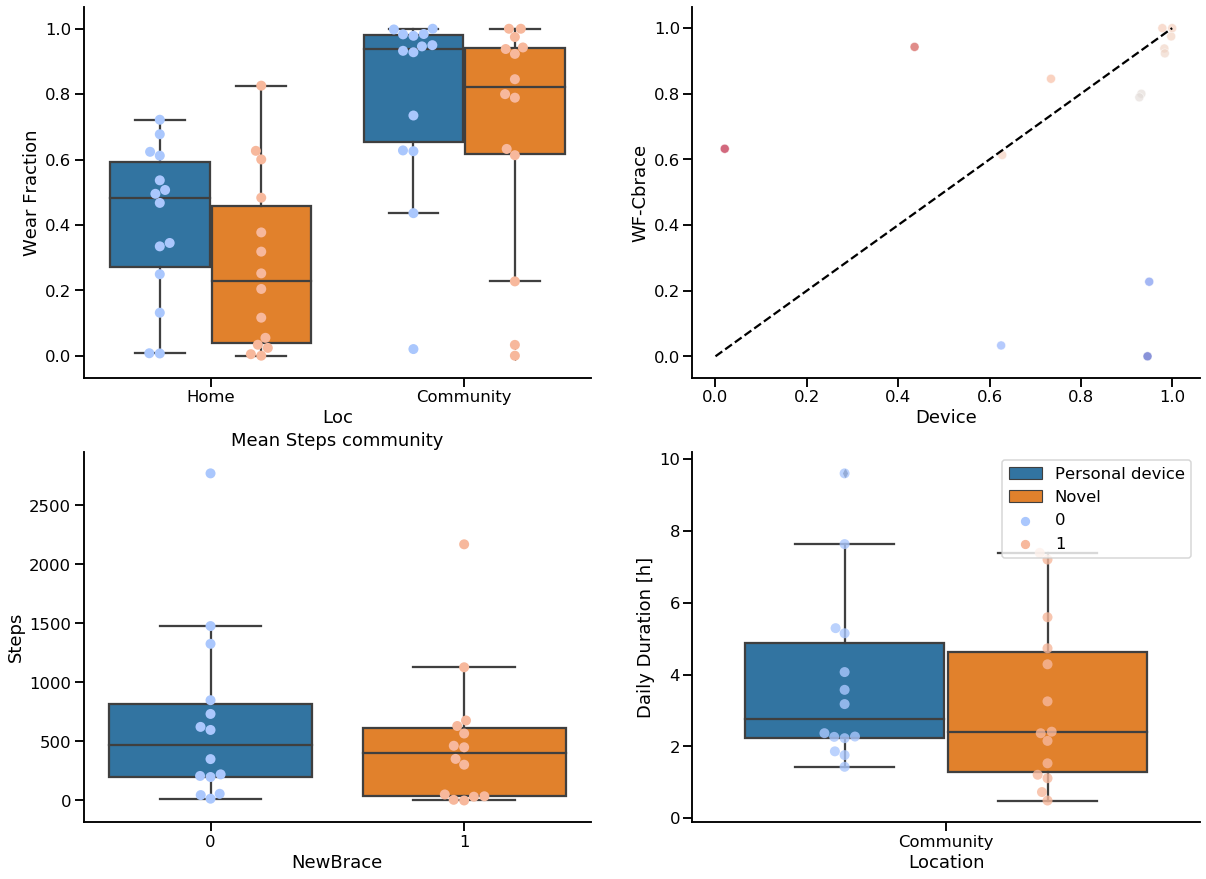

In [70]:
#new plots
sns.set_context('talk',font_scale=1)
fig=plt.figure(figsize=(20,15))
fig.add_subplot(221)
ax = sns.boxplot(data=durdata,x='Loc',y='Wear Fraction',hue='NewBrace')
ax = sns.swarmplot(data=durdata, x='Loc', y='Wear Fraction', hue='NewBrace', palette='coolwarm',size=10, dodge=True)
ax.legend_.remove()
sns.despine()

fig.add_subplot(222)
ax = sns.scatterplot(x='WF-Personal', y='WF-Cbrace', hue='delta', data=AB, alpha=0.6, palette='coolwarm')
plt.plot([0,1],[0,1], c='black', linestyle='--')
ax.legend_.remove()
sns.despine()
# ax.legend(loc='right', bbox_to_anchor=(1.5, 0.5))

plt.xlabel('Device')
sns.despine()
fig.add_subplot(223)
sns.boxplot(x='NewBrace', y='Steps',data=dur)
ax = sns.swarmplot(x='NewBrace', y='Steps', data=dur, size=10, palette='coolwarm')
# plt.colorbar()
ax.set_title('Mean Steps community')
sns.despine()
# ax.get_legend().remove()
sns.despine()

fig.add_subplot(224)
ax=sns.boxplot(data=dur,x='Loc',y='Daily Duration',hue='NewBrace')
ax = sns.swarmplot(data=dur, x='Loc', y='Daily Duration', hue='NewBrace', palette='coolwarm',
                   size=10, dodge=True, alpha=0.8)
L=ax.legend(loc=1)
L.get_texts()[0].set_text('Personal device')
L.get_texts()[1].set_text('Novel')
sns.despine()
plt.xlabel('Location')
plt.ylabel('Daily Duration [h]')

# plt.savefig('./Figs/Fig2.jpg', dpi=300 )

In [33]:
# sns.set_context('talk',font_scale=1.6)
# fig=plt.figure(figsize=(20,15))
# fig.add_subplot(221)
# ax = sns.boxplot(data=durdata,x='Loc',y='Wear Fraction',hue='NewBrace')
# ax = sns.swarmplot(data=durdata, x='Loc', y='Wear Fraction', hue='NewBrace', palette='Set2',size=10, dodge=True)
# ax.legend_.remove()

# plt.xlabel('Location')
# sns.despine()
# fig.add_subplot(222)
# ax=sns.boxplot(data=durdata,x='Loc',y='Steps',hue='NewBrace')
# ax = sns.swarmplot(data=durdata, x='Loc', y='Steps', hue='NewBrace', palette='Set2',size=10, dodge=True)
# ax.set_ylabel('Mean Daily Steps')
# ax.legend_.remove()
# plt.xlabel('Location')
# sns.despine()

# fig.add_subplot(223)
# ax=sns.boxplot(data=durdata,x='Loc',y='Daily Duration',hue='NewBrace')
# ax = sns.swarmplot(data=durdata, x='Loc', y='Daily Duration', hue='NewBrace' ,size=10, dodge=True, alpha=0.8)
# L=ax.legend(loc=1)
# L
# L.get_texts()[0].set_text('Personal device')
# L.get_texts()[1].set_text('C-brace')
# sns.despine()
# plt.xlabel('Location')
# plt.ylabel('Daily Duration [h]')

# fig.add_subplot(224)
# x = dur.query('NewBrace==0')['Wear Fraction']
# y = dur.query('NewBrace==1')['Wear Fraction']
# ax = plt.scatter(x,y)
# mx=min(x)
# my=min(y)
# m = min(mx,my)
# Mx=max(x)
# My=max(y)
# M =max(Mx,My)
# plt.plot([m,M],[m,M], c='black', linestyle='--')
# plt.xlabel('Wear Fraction - Personal device')
# plt.ylabel('Wear Fraction - C-brace')
# sns.despine()

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
#                 wspace=0.3, hspace=0.4)
# sns.despine()

In [34]:
# sns.set_context('talk')
# plt.figure(figsize=(8,6))
# ax = sns.scatterplot(x='WF-Personal', y='WF-Cbrace', hue='delta', data=AB, alpha=0.6, palette='coolwarm', 
#                     vmin=-1, vmax=0.61)
# sns.despine()
# ax.legend(loc='right', bbox_to_anchor=(1.5, 0.5))

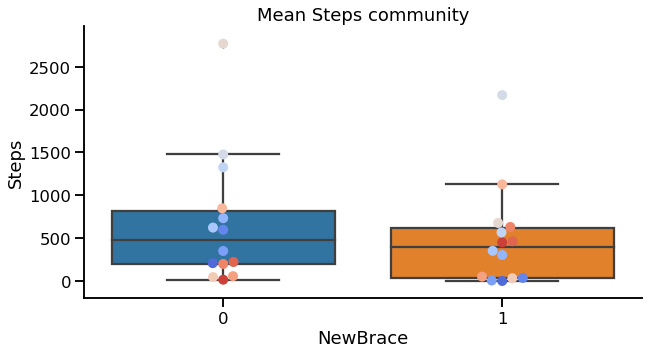

In [35]:
#RED love Cbrace ; BLUE hate it
plt.figure(figsize=(10,5))
sns.boxplot(x='NewBrace', y='Steps',data=dur)
ax = sns.swarmplot(x='NewBrace', y='Steps', hue='delta', data=dur,size=10, palette='coolwarm')
# plt.colorbar()
ax.set_title('Mean Steps community')
sns.despine()
ax.get_legend().remove()

## Scatter plot comparisons - Clinical and Mobility Metrics (Fig.2)

In [76]:
#summary plot
homedur['Loc']='Home'
dur['Loc']='Community'
durdata = pd.concat([homedur,dur])

In [77]:
# print('MedianHome Baseline = %.2f h'%homedur[homedur['NewBrace']==0]['Duration_Median'].median())
# print('MedianHome Cbrace = %.2f h'%homedur[homedur['NewBrace']==1]['Duration_Median'].median())
# print('MedianComm Baseline = %.2f h'%dur[dur['NewBrace']==0]['Duration_Median'].median())
# print('MedianComm Cbrace = %.2f h'%dur[dur['NewBrace']==1]['Duration_Median'].median())

In [78]:
def plot_subj_change(data, feature, ax, i, label=None, plotStats=False):
    for s in data['SubjID'].unique():
        x = np.random.randn(1)*0.01
        a = data.loc[(data.SubjID==s) & (data.NewBrace==0)][feature]
        b = data.loc[(data.SubjID==s) & (data.NewBrace==1)][feature]
        ax[i].plot(np.array([x,x+1]),np.array([a.values,b.values]), marker='o', alpha=0.6, linestyle='--', 
                   linewidth=1)
        ax[i].set_xlabel('Device')
        ax[i].set_xticks([0,1])
        ax[i].set_ylabel(feature)
        ax[i].set_xticklabels(['Personal','Novel'])
    muA = data.loc[data.NewBrace==0][feature].median()
    muB = data.loc[data.NewBrace==1][feature].median()
    ax[i].plot([x, x+1], [muA,muB], marker='^', color='black', markersize=12, alpha=0.7, linestyle='-',
                          linewidth=2)
    if label is not None:
        ax[i].set_ylabel(label)
    sns.despine()    
    plt.tight_layout()
    if plotStats:
        plotStatAnnotations(x+1,muB,SigProbs[i],ax[i])

In [79]:
def plotStatAnnotations(x,y,prob,ax):
    sig = ' '
    sig+='*' if prob<0.05 else ''
    sig+='*' if prob<0.01 else ''
    ax.text(x,y,sig)

In [156]:
dur.query('NewBrace==0')

,SubjID,Duration_Mean,Duration_Median,Wear Fraction,NewBrace,6mwt,10mwt_ss,Steps,Cadence,Daily Duration,Age,BaselineYrs,DailyWF,Loc,delta
SubjID,,,,,,,,,,,,,,,
CBR21,CBR21,1.004105,0.341667,0.625459,0,246.46,0.70,350.494118,0.360918,2.273333,65.0,60.00,0.625459,Community,-0.592380
CBR30,CBR30,0.595975,0.329444,0.982844,0,333.45,0.99,1477.228261,0.337844,4.069028,55.0,37.00,0.982844,Community,-0.044837
CBR22,CBR22,1.420190,0.368056,0.734635,0,313.69,0.93,198.789474,0.249235,5.292222,28.0,2.00,0.734635,Community,0.111041
CBR27,CBR27,0.367698,0.122222,0.978453,0,119.18,0.44,56.571429,0.130778,1.430417,72.0,70.00,0.978453,Community,0.021547
CBR26,CBR26,0.424357,0.228333,0.997807,0,443.20,1.22,2770.495192,0.406853,5.149444,52.0,0.50,0.997807,Community,-0.023049
CBR11,CBR11,1.020883,0.191667,0.020286,0,302.49,0.65,15.190840,0.266627,7.633333,35.0,5.00,0.020286,Community,0.612131
CBR16,CBR16,0.544159,0.186667,1.000000,0,159.05,0.38,849.109589,0.314785,3.177222,44.0,1.00,1.000000,Community,0.000000
CBR28,CBR28,0.695230,0.438056,0.932507,0,286.89,0.57,623.275862,0.342951,2.227500,44.0,0.08,0.932507,Community,-0.132507
CBR15,CBR15,1.449819,0.746667,0.946003,0,149.15,0.44,207.753623,0.171378,3.573889,68.0,0.50,0.946003,Community,-0.946003


In [172]:
#check normality
from itertools import product
feats = ['6mwt','10mwt_ss','Steps','Cadence','Daily Duration','Wear Fraction']
brace = [0,1]
for f,d in product(feats,brace):
    stats,p = shapiro(dur.query('NewBrace==@d')[f])
    print('Statistics=%.3f, p=%.3f' % (stats, p))
    alpha = .05
    if p > alpha:
        print(f'{d, f} Sample looks Gaussian (fail to reject H0)')
    else:
        print(f'{d, f} Sample does not look Gaussian (reject H0)')

Statistics=0.952, p=0.599
(0, '6mwt') Sample looks Gaussian (fail to reject H0)
Statistics=0.964, p=0.785
(1, '6mwt') Sample looks Gaussian (fail to reject H0)
Statistics=0.928, p=0.286
(0, '10mwt_ss') Sample looks Gaussian (fail to reject H0)
Statistics=0.926, p=0.269
(1, '10mwt_ss') Sample looks Gaussian (fail to reject H0)
Statistics=0.804, p=0.006
(0, 'Steps') Sample does not look Gaussian (reject H0)
Statistics=0.778, p=0.003
(1, 'Steps') Sample does not look Gaussian (reject H0)
Statistics=0.960, p=0.729
(0, 'Cadence') Sample looks Gaussian (fail to reject H0)
Statistics=nan, p=1.000
(1, 'Cadence') Sample looks Gaussian (fail to reject H0)
Statistics=0.835, p=0.014
(0, 'Daily Duration') Sample does not look Gaussian (reject H0)
Statistics=0.901, p=0.117
(1, 'Daily Duration') Sample looks Gaussian (fail to reject H0)
Statistics=0.739, p=0.001
(0, 'Wear Fraction') Sample does not look Gaussian (reject H0)
Statistics=0.794, p=0.004
(1, 'Wear Fraction') Sample does not look Gaussian 

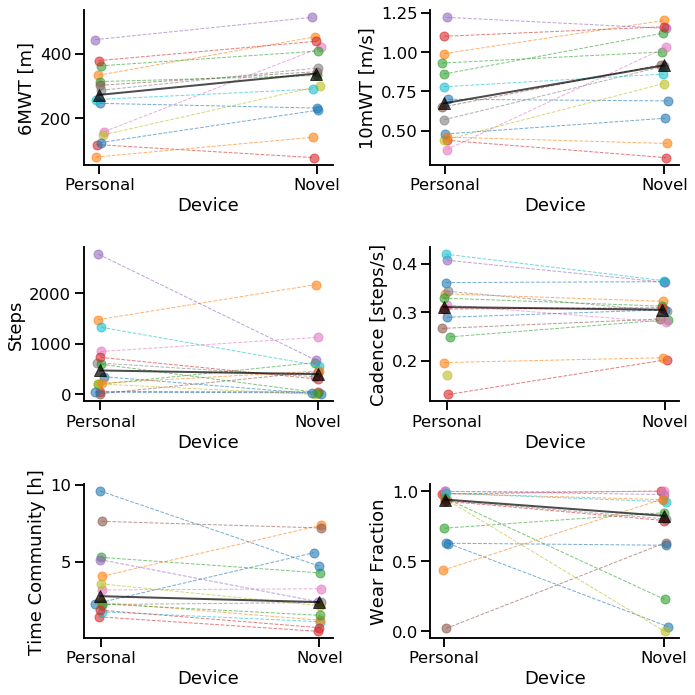

In [80]:
sns.set_context('talk')
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax = ax.ravel()
plot_subj_change(homedur, '6mwt', ax, 0, label='6MWT [m]')
plot_subj_change(homedur, '10mwt_ss', ax, 1, label='10mWT [m/s]')
plot_subj_change(durdata.query('Loc!="Home"'), 'Steps', ax, 2)
plot_subj_change(durdata.query('Loc!="Home"'), 'Cadence', ax, 3, label='Cadence [steps/s]')
plot_subj_change(durdata.query('Loc!="Home"'), 'Daily Duration', ax, 4, label='Time Community [h]')
plot_subj_change(durdata.query('Loc!="Home"'), 'Wear Fraction', ax, 5)
# plt.savefig('./Figs/Fig2.png', dpi=300)

In [81]:
#comparison of wear fraction
featcomp = ['Wear Fraction','Daily Duration','SubjID']
A = dur.query('NewBrace==0')[featcomp]
A.index = A.SubjID
A.drop('SubjID',axis=1, inplace=True)
B = dur.query('NewBrace==1')[featcomp]
B.index = B.SubjID
B.drop('SubjID',axis=1, inplace=True)
A.rename(columns={'Wear Fraction':'WF-Personal', 'Daily Duration':'DT-Personal'}, inplace=True)
B.rename(columns={'Wear Fraction':'WF-Novel', 'Daily Duration':'DT-Novel'}, inplace=True)
AB = pd.concat((A,B),axis=1)
AB['delta'] = AB['WF-Novel']-AB['WF-Personal']
AB['deltaT'] = AB['DT-Novel']-AB['DT-Personal']
# AB.sort_values('delta')

#add column on deltaUse
# dur.index = dur['SubjID']
# dur['delta'] = AB['delta']

In [100]:
pd.concat((dur[['Steps','NewBrace']].groupby('SubjID').max(), homedur[['Steps','NewBrace','SubjID']].groupby('SubjID').max()), axis=1)

,Steps,NewBrace,Steps,NewBrace
SubjID,,,,
CBR08,463.515152,1,934.393939,1
CBR11,450.664740,1,396.965517,1
CBR15,207.753623,1,413.833333,1
CBR16,1128.192308,1,1158.361111,1
CBR19,45.750000,1,18.000000,1
CBR21,350.494118,1,716.289474,1
CBR22,630.843137,1,105.583333,1
CBR24,597.406780,1,1110.424658,1
CBR25,1326.813559,1,3324.192308,1


In [113]:
maxsteps = dur[['Steps']].groupby(['SubjID']).max()
AB['maxsteps'] = maxsteps

In [125]:
AB

,WF-Personal,DT-Personal,WF-Novel,DT-Novel,delta,deltaT,maxsteps
SubjID,,,,,,,
CBR21,0.625459,2.273333,0.033078,5.595833,-0.592380,3.322500,350.494118
CBR30,0.982844,4.069028,0.938007,7.388889,-0.044837,3.319861,2169.580460
CBR22,0.734635,5.292222,0.845676,4.285000,0.111041,-1.007222,630.843137
CBR27,0.978453,1.430417,1.000000,0.491389,0.021547,-0.939028,56.571429
CBR26,0.997807,5.149444,0.974758,2.408611,-0.023049,-2.740833,2770.495192
CBR11,0.020286,7.633333,0.632417,7.202222,0.612131,-0.431111,450.664740
CBR16,1.000000,3.177222,1.000000,3.253056,0.000000,0.075833,1128.192308
CBR28,0.932507,2.227500,0.800000,2.365278,-0.132507,0.137778,623.275862
CBR15,0.946003,3.573889,0.000000,2.152778,-0.946003,-1.421111,207.753623


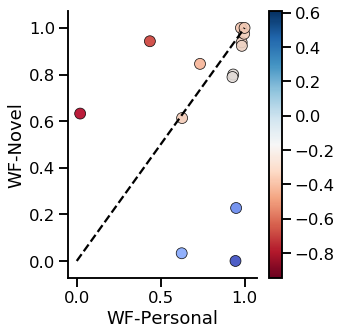

In [128]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
# ax = ax.ravel()
sns.scatterplot(x='WF-Personal', y='WF-Novel', hue='delta', data=AB, alpha=0.9, palette='coolwarm', ax=ax, s=120, edgecolor='black')
# sns.scatterplot(x='WF-Personal', y='WF-Novel', hue='delta', data=AB, alpha=0.9, palette='coolwarm', ax=ax, 
#                 size='maxsteps', sizes=(100,1000), edgecolor='black')
# ax.plot([0,1],[0,1], c='black', linestyle='--')

ax.plot([0,1],[0,1], c='black', linestyle='--')
ax.legend_.remove()
# sns.scatterplot(x='DT-Personal', y='DT-Cbrace', hue='delta', data=AB, alpha=0.9, palette='coolwarm', ax=ax[1], s=120, edgecolor='black')
# ax[1].plot([0,10],[0,10], c='black', linestyle='--')
# ax[1].legend_.remove()
sns.despine()

norm = plt.Normalize(AB['delta'].min(), AB['delta'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
ax.figure.colorbar(sm)

# plt.colorbar()
plt.tight_layout()
# plt.savefig('./Figs/Fig3.jpg', dpi=300)


## Statistics on mean features (homedur and dur) per subject

Statistics=0.868, p=0.040
(1, '6mwt') Sample does not look Gaussian (reject H0)
Statistics=0.906, p=0.138
(1, '10mwt_ss') Sample looks Gaussian (fail to reject H0)
Statistics=0.874, p=0.048
(1, 'Steps') Sample does not look Gaussian (reject H0)
Statistics=nan, p=1.000
(1, 'Cadence') Sample looks Gaussian (fail to reject H0)
Statistics=0.882, p=0.061
(1, 'Daily Duration') Sample looks Gaussian (fail to reject H0)
Statistics=0.908, p=0.146
(1, 'Wear Fraction') Sample looks Gaussian (fail to reject H0)


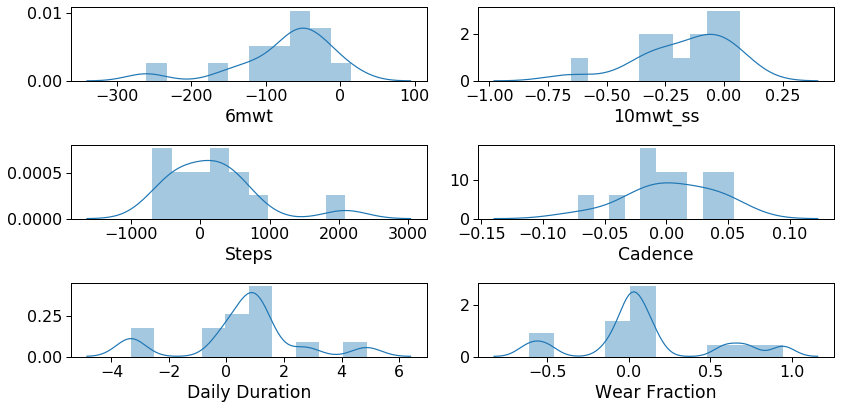

In [183]:
feats = ['6mwt','10mwt_ss','Steps','Cadence','Daily Duration','Wear Fraction']
fig,ax = plt.subplots(3,2, figsize=(12,6)); ax =ax.ravel()
for i,f in enumerate(feats):
    #CLINICAL
    x = dur[dur['NewBrace']==0][f]
    y = dur[dur['NewBrace']==1][f]
    stats,p = shapiro(x-y)
    print('Statistics=%.3f, p=%.3f' % (stats, p))
    alpha = .05
    if p > alpha:
        print(f'{d, f} Sample looks Gaussian (fail to reject H0)')
    else:
        print(f'{d, f} Sample does not look Gaussian (reject H0)')
    sns.distplot(x-y, ax=ax[i], bins=10)
plt.tight_layout()

In [185]:
#sign rank test differences in median duration
from scipy.stats import wilcoxon
# from scipy.stats import ttest_rel

SigProbs = []

#CLINICAL
x = homedur[homedur['NewBrace']==0]['6mwt']
y = homedur[homedur['NewBrace']==1]['6mwt']
tstat,prob = wilcoxon(x,y)
SigProbs.append(prob)
print(f'6mwt, {tstat}, {prob:.3f}, {x.median():.2f}, {y.median():.2f}')
x = homedur[homedur['NewBrace']==0]['10mwt_ss']
y = homedur[homedur['NewBrace']==1]['10mwt_ss']
# tstat,prob = wilcoxon(x,y)
tstat,prob = ttest_rel(x,y,nan_policy='omit')
SigProbs.append(prob)
print(f'10MWT, {tstat}, {prob:.3f}, {x.median():.2f}, {y.median():.2f}')

#MOBILITY METRICS IN COMMUNITY
x = dur[dur['NewBrace']==0]['Steps']
y = dur[dur['NewBrace']==1]['Steps']
tstat,prob = wilcoxon(x,y)
SigProbs.append(prob)
print(f'Steps, {tstat}, {prob:.3f}, {x.median():.2f}, {y.median():.2f}')
x = dur[dur['NewBrace']==0]['Cadence']
y = dur[dur['NewBrace']==1]['Cadence']
# tstat,prob = wilcoxon(x,y)
tstat,prob = ttest_rel(x,y,nan_policy='omit')
SigProbs.append(prob)
print(f'Cadence, {tstat}, {prob:.3f}, {x.median():.2f}, {y.median():.2f}')
x = dur[dur['NewBrace']==0]['Daily Duration']
y = dur[dur['NewBrace']==1]['Daily Duration']
# tstat,prob = wilcoxon(x,y)
tstat,prob = ttest_rel(x,y,nan_policy='omit')
SigProbs.append(prob)
print(f'Daily Time, {tstat}, {prob:.3f}, {x.median():.2f}, {y.median():.2f}, IQR={ list(x.quantile([0.25, 0.75]).values)}, {list(y.quantile([0.25, 0.75]).values)} ')
x = dur[dur['NewBrace']==0]['Wear Fraction']
y = dur[dur['NewBrace']==1]['Wear Fraction']
# tstat,prob = wilcoxon(x,y)
tstat,prob = ttest_rel(x,y,nan_policy='omit')
SigProbs.append(prob)
print(f'WF, {tstat}, {prob:.3f}, {x.median():.2f}, {y.median():.2f},IQR={ list(x.quantile([0.25, 0.75]).values)}, {list(y.quantile([0.25, 0.75]).values)} ')

# #MOBILITY METRICS HOME
# x = homedur[homedur['NewBrace']==0]['Steps']
# y = homedur[homedur['NewBrace']==1]['Steps']
# tstat,prob = wilcoxon(x,y)
# print('Steps Home',tstat,prob)

6mwt, 5.0, 0.003, 272.53, 338.51
10MWT, -2.7954256262925274, 0.015, 0.67, 0.92
Steps, 41.0, 0.470, 473.95, 401.33
Cadence, 0.407374000385431, 0.691, 0.31, 0.30
Daily Time, 1.0576931950745097, 0.309, 2.77, 2.39, IQR=[2.236736111111111, 4.8793402803333334], [1.2888194444444445, 4.619166666666666] 
WF, 0.9027042044769442, 0.383, 0.94, 0.82,IQR=[0.6545316869954733, 0.9817463364358802], [0.618059394165402, 0.9415884889845212] 


** The new brace does not significantly alter the wear fractions and steps per hour **

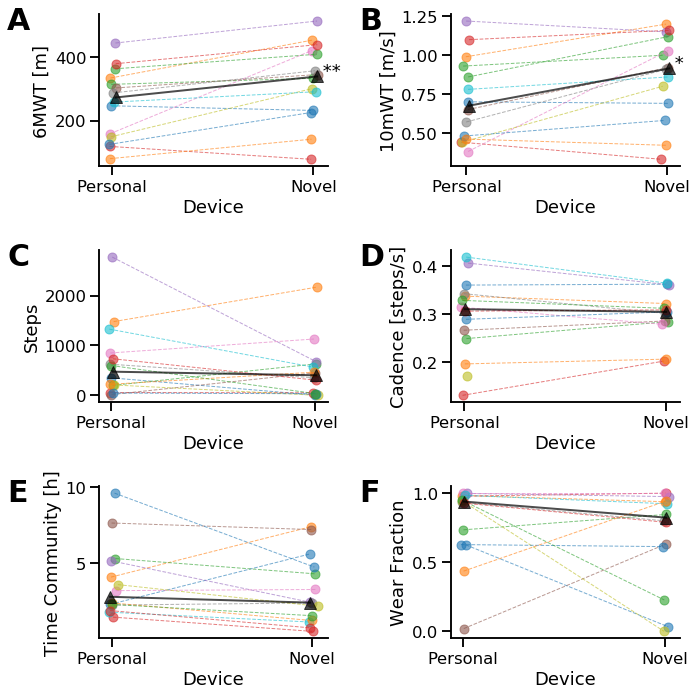

In [35]:
sns.set_context('talk')
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax = ax.ravel()
plot_subj_change(homedur, '6mwt', ax, 0, label='6MWT [m]',plotStats=True)
ax[0].text(-0.4, .9, 'A', transform=ax[0].transAxes, size=30, weight='bold')
plot_subj_change(homedur, '10mwt_ss', ax, 1, label='10mWT [m/s]',plotStats=True)
ax[1].text(-0.4, .9, 'B', transform=ax[1].transAxes, size=30, weight='bold')
plot_subj_change(durdata.query('Loc!="Home"'), 'Steps', ax, 2,plotStats=True)
ax[2].text(-0.4, .9, 'C', transform=ax[2].transAxes, size=30, weight='bold')
plot_subj_change(durdata.query('Loc!="Home"'), 'Cadence', ax, 3, label='Cadence [steps/s]',plotStats=True)
ax[3].text(-0.4, .9, 'D', transform=ax[3].transAxes, size=30, weight='bold')
plot_subj_change(durdata.query('Loc!="Home"'), 'Daily Duration', ax, 4, label='Time Community [h]',plotStats=True)
ax[4].text(-0.4, .9, 'E', transform=ax[4].transAxes, size=30, weight='bold')
plot_subj_change(durdata.query('Loc!="Home"'), 'Wear Fraction', ax, 5,plotStats=True)
ax[5].text(-0.4, .9, 'F', transform=ax[5].transAxes, size=30, weight='bold')
plt.savefig('./Figs/Fig2.png', dpi=300)

In [163]:
# dur['Cadence']

In [164]:
T = dur.copy()
T.index = T.SubjID
x = T[T['NewBrace']==0]['6mwt']
y = T[T['NewBrace']==1]['6mwt']

In [165]:
#stats
x = dur[dur['NewBrace']==0]['Wear Fraction']
y = dur[dur['NewBrace']==1]['Wear Fraction']
tstat,prob = wilcoxon(x,y)


In [166]:
homedur.head()

,SubjID,Duration_Mean,Duration_Median,Wear Fraction,NewBrace,6mwt,10mwt_ss,Steps,Cadence,Daily Duration,Age,BaselineYrs,Loc
0,CBR21,6.799006,6.284861,0.023871,1,231.93,0.69,32.200000,0.206293,17.071111,65.0,60.0,Home
1,CBR30,5.065320,3.038611,0.626585,1,452.17,1.20,1706.117647,0.281388,13.980556,55.0,37.0,Home
2,CBR22,0.251551,0.185833,0.825910,1,332.61,1.00,105.583333,0.356069,0.222778,28.0,2.0,Home
3,CBR27,21.142396,23.997222,0.004652,1,78.82,0.33,15.062500,0.194220,23.997222,72.0,70.0,Home
4,CBR26,11.163413,9.988889,0.204154,1,512.14,1.15,329.650794,0.327492,21.665000,52.0,0.5,Home


In [167]:
homedur[homedur['NewBrace']==1]['Wear Fraction'].median()-homedur[homedur['NewBrace']==0]['Wear Fraction'].median()

-0.25323981297366815

In [168]:
print('MedianHome Baseline Wear Fraction = %.2f'%homedur[homedur['NewBrace']==0]['Wear Fraction'].median())
print('MedianHome Cbrace Wear Fraction = %.2f'%homedur[homedur['NewBrace']==1]['Wear Fraction'].median())
# print('MedianHome differnce = %.2f'%homedur[homedur['NewBrace']==1]['Wear Fraction'].median()-homedur[homedur['NewBrace']==1]['Wear Fraction'].median())
print('MedianHome Baseline Steps = %.2f'%homedur[homedur['NewBrace']==0]['Steps'].median())
print('MedianHome Cbrace Steps = %.2f'%homedur[homedur['NewBrace']==1]['Steps'].median())
print('MedianHome Baseline DailyTime = %.2f h'%homedur[homedur['NewBrace']==0]['Daily Duration'].median())
print('MedianHome Cbrace DailyTime = %.2f h'%homedur[homedur['NewBrace']==1]['Daily Duration'].median())


print('\nMedianComm Baseline Wear Fraction = %.2f'%dur[dur['NewBrace']==0]['Wear Fraction'].median())
print('MedianComm Cbrace Wear Fraction = %.2f'%dur[dur['NewBrace']==1]['Wear Fraction'].median())
print('MedianComm Baseline Steps = %.2f'%dur[dur['NewBrace']==0]['Steps'].median())
print('MedianComm Cbrace Steps = %.2f'%dur[dur['NewBrace']==1]['Steps'].median())
print('MedianComm Baseline DailyTime = %.2f h'%dur[dur['NewBrace']==0]['Daily Duration'].median())
print('MedianComm Cbrace DailyTime = %.2f h'%dur[dur['NewBrace']==1]['Daily Duration'].median())

# print('MedianHome Baseline Steps = %.2f'%homedur[homedur['NewBrace']==0]['Steps per Hour'].median())
# print('MedianHome Cbrace Steps = %.2f'%homedur[homedur['NewBrace']==1]['Steps per Hour'].median())
# print('MedianComm Baseline Steps = %.2f'%dur[dur['NewBrace']==0]['Steps per Hour'].median())
# print('MedianComm Cbrace Steps = %.2f'%dur[dur['NewBrace']==1]['Steps per Hour'].median())


print('\nDaily duration IQR Baseline')
print(np.percentile(dur[dur['NewBrace']==0]['Daily Duration'].values,25),np.percentile(dur[dur['NewBrace']==0]['Daily Duration'].values,75))
print('\nDaily duration IQR Cbrace')
print(np.percentile(dur[dur['NewBrace']==1]['Daily Duration'].values,25),np.percentile(dur[dur['NewBrace']==1]['Daily Duration'].values,75))



MedianHome Baseline Wear Fraction = 0.48
MedianHome Cbrace Wear Fraction = 0.23
MedianHome Baseline Steps = 565.06
MedianHome Cbrace Steps = 328.58
MedianHome Baseline DailyTime = 18.65 h
MedianHome Cbrace DailyTime = 18.64 h

MedianComm Baseline Wear Fraction = 0.94
MedianComm Cbrace Wear Fraction = 0.82
MedianComm Baseline Steps = 473.95
MedianComm Cbrace Steps = 401.33
MedianComm Baseline DailyTime = 2.77 h
MedianComm Cbrace DailyTime = 2.39 h

Daily duration IQR Baseline
2.236736111111111 4.8793402803333334

Daily duration IQR Cbrace
1.2888194444444445 4.619166666666666


In [169]:
# #normality test
# from scipy.stats import ttest_rel, shapiro
# x = homedur[homedur['NewBrace']==0]['Duration_Median']
# fstat,pval = shapiro(x)
# print(fstat,pval)
# y = homedur[homedur['NewBrace']==1]['Duration_Median']
# fstat,pval = shapiro(y)
# print(fstat,pval)
# x = dur[dur['NewBrace']==0]['Duration_Median']
# fstat,pval = shapiro(x)
# print(fstat,pval)
# y = dur[dur['NewBrace']==1]['Duration_Median']
# fstat,pval = shapiro(y)
# print(fstat,pval)

## Deep dive into Steps at Home and Community

Time community / Time Home 


In [131]:
(Data.groupby('SubjID').Duration.sum()/Datahome.groupby('SubjID').Duration.sum())

SubjID
CBR08     0.110072
CBR11     0.577786
CBR15     0.225939
CBR16     0.152628
CBR19     1.160152
CBR21     0.249579
CBR22    14.756954
CBR24     0.052204
CBR25     0.026020
CBR26     0.176306
CBR27     0.019245
CBR28     0.019762
CBR30     0.297481
CBR31     0.087156
Name: Duration, dtype: float64

Maybe CBR22 didn't turn on the GPS at home?

In [258]:
durdata.query('SubjID=="CBR22"')

,SubjID,Duration_Mean,Duration_Median,Wear Fraction,NewBrace,6mwt,10mwt_ss,Steps,Cadence,Daily Duration,Age,BaselineYrs,DailyWF,Loc,delta
2,CBR22,0.251551,0.185833,0.825910,1,332.61,1.00,105.583333,0.356069,0.222778,28.0,2.0,0.825910,Home,NaN
16,CBR22,2.066597,0.543472,0.623604,0,313.69,0.93,100.000000,0.390855,0.543472,28.0,2.0,0.623604,Home,NaN
CBR22,CBR22,2.207157,0.511111,0.845676,1,332.61,1.00,630.843137,0.284543,4.285000,28.0,2.0,0.845676,Community,0.111041
CBR22,CBR22,1.420190,0.368056,0.734635,0,313.69,0.93,198.789474,0.249235,5.292222,28.0,2.0,0.734635,Community,0.111041


In [133]:
print(len(Data.query('SubjID=="CBR22"').Date.unique()))
print(len(Datahome.query('SubjID=="CBR22"').Date.unique()))

28
14


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

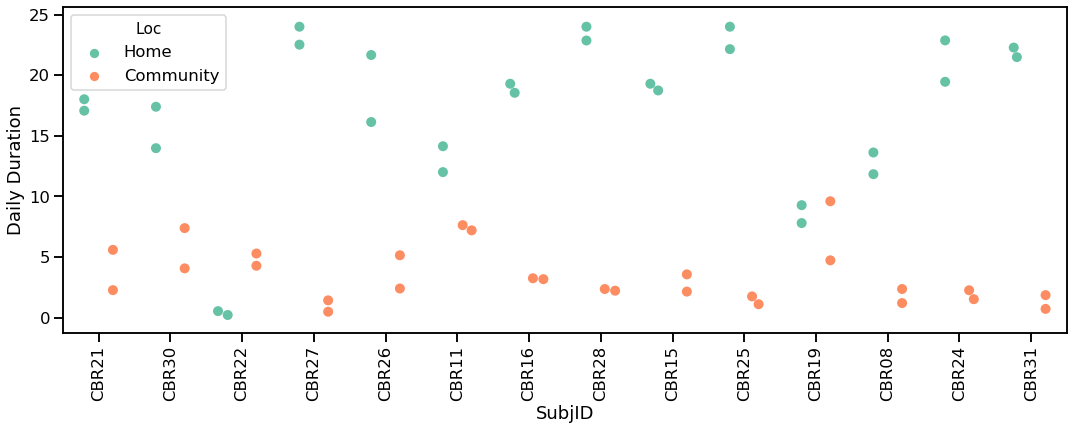

In [134]:
plt.figure(figsize=(18,6))
ax = sns.swarmplot(data=durdata, x='SubjID', y='Daily Duration', hue='Loc', palette='Set2',size=10, dodge=True)
# ax.set_xticks(rotation=90)
plt.xticks(rotation=90)
# ax.legend_.remove()

In [135]:
Datahome['Location'] = 'Home'
Data['Location'] = 'Community'
Features = pd.concat((Datahome,Data))

In [194]:
Data['Date']=pd.to_datetime(Data.Date)

In [213]:
duration = pd.DataFrame(data=[], columns=['SubjID','NewBrace','TrialDuration'])
for device in Data['NewBrace'].unique():
    for s in Data['SubjID'].unique():
        Data_s = Data.query('SubjID==@s & NewBrace==@device')['Date']
#         print(s,device,(Data_s.iloc[-1]-Data_s.iloc[0]))
        duration = pd.concat((duration,pd.DataFrame({'SubjID':s, 'NewBrace':device,
                                           'TrialDuration':Data_s.iloc[-1]-Data_s.iloc[0]}, index=[0])), axis=0)

In [228]:
duration.sort_values('SubjID').query('NewBrace==1')

,SubjID,NewBrace,TrialDuration
0,CBR08,1,34
0,CBR11,1,51
0,CBR15,1,18
0,CBR16,1,23
0,CBR19,1,2
0,CBR21,1,26
0,CBR22,1,34
0,CBR24,1,28
0,CBR25,1,33
0,CBR26,1,29


In [256]:
print(sum(duration.sort_values('SubjID').query('NewBrace==0')['TrialDuration'] < 17))
print(sum(duration.sort_values('SubjID').query('NewBrace==1')['TrialDuration'] < 17))

2
2


In [222]:
duration['TrialDuration']=(duration['TrialDuration']).apply(lambda x:x.days)

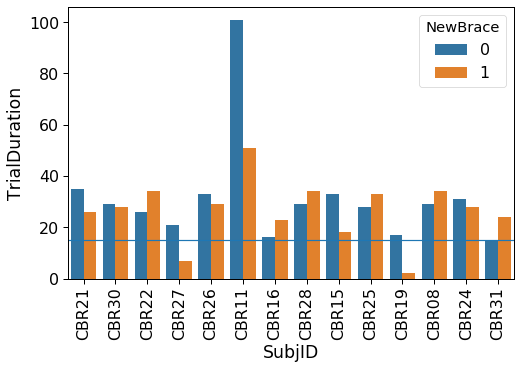

In [226]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
sns.barplot(data=duration, x='SubjID', y='TrialDuration', hue='NewBrace')
plt.xticks(rotation=90)
plt.axhline(y=15)

In [138]:
#rec days per subject (for both braces)
pd.DataFrame({'Community':Data.groupby('SubjID').Date.unique().apply(len), 
         'Home':Datahome.groupby('SubjID').Date.unique().apply(len)})

,Community,Home
SubjID,,
CBR08,27,41
CBR11,68,66
CBR15,30,31
CBR16,27,26
CBR19,4,3
CBR21,53,52
CBR22,28,14
CBR24,31,62
CBR25,29,65


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

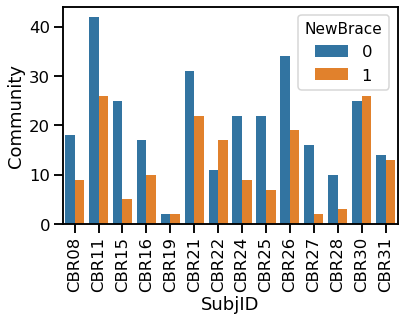

In [146]:
Ndays = pd.DataFrame({'Community':Data.groupby(['SubjID','NewBrace']).Date.unique().apply(len), 
         'Home':Datahome.groupby(['SubjID','NewBrace']).Date.unique().apply(len)})
Ndays.reset_index(inplace=True)
fig,ax = plt.subplots(1,1)
sns.barplot(data=Ndays, x='SubjID',y='Community',hue='NewBrace',ax=ax)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

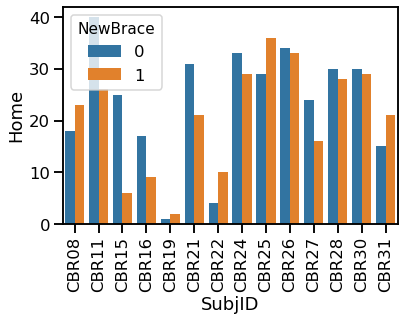

In [147]:
Ndays = pd.DataFrame({'Community':Data.groupby(['SubjID','NewBrace']).Date.unique().apply(len), 
         'Home':Datahome.groupby(['SubjID','NewBrace']).Date.unique().apply(len)})
Ndays.reset_index(inplace=True)
fig,ax = plt.subplots(1,1)
sns.barplot(data=Ndays, x='SubjID',y='Home',hue='NewBrace',ax=ax)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

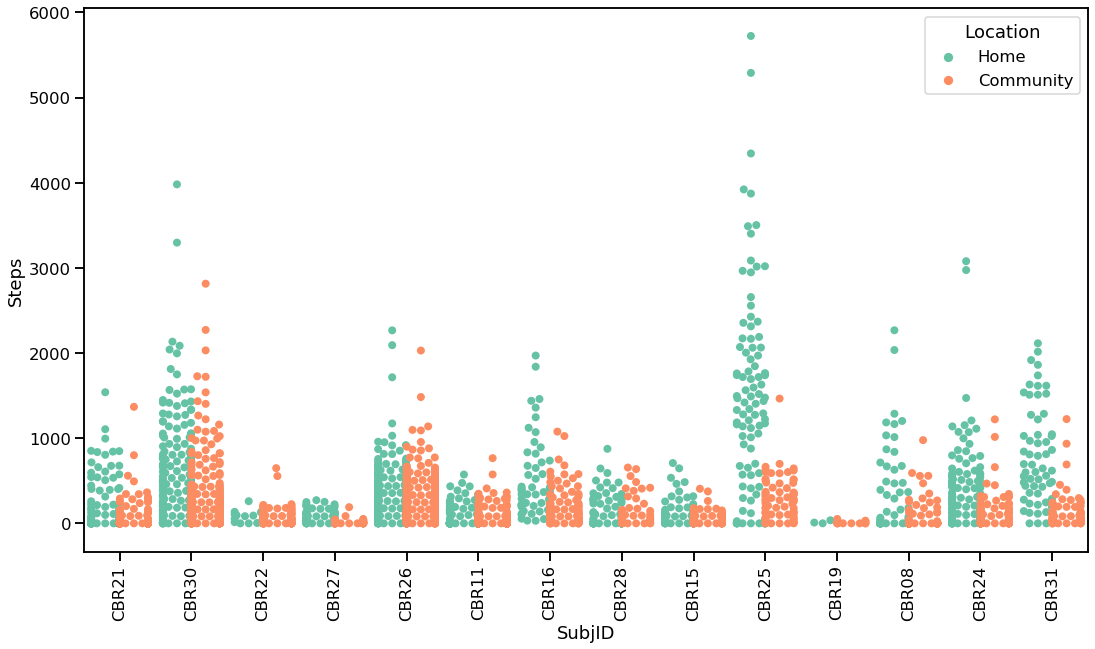

In [176]:
plt.figure(figsize=(18,10))
ax = sns.swarmplot(data=Features, x='SubjID', y='Steps', hue='Location', palette='Set2',size=8, dodge=True)
plt.xticks(rotation=90)

In [177]:
# Features.query('Location=="Home"').plot.scatter(x='Duration',y='Steps')

Is number of steps correlated with the time people is at home? (i.e. are they walking more when they are staying longer at home?)

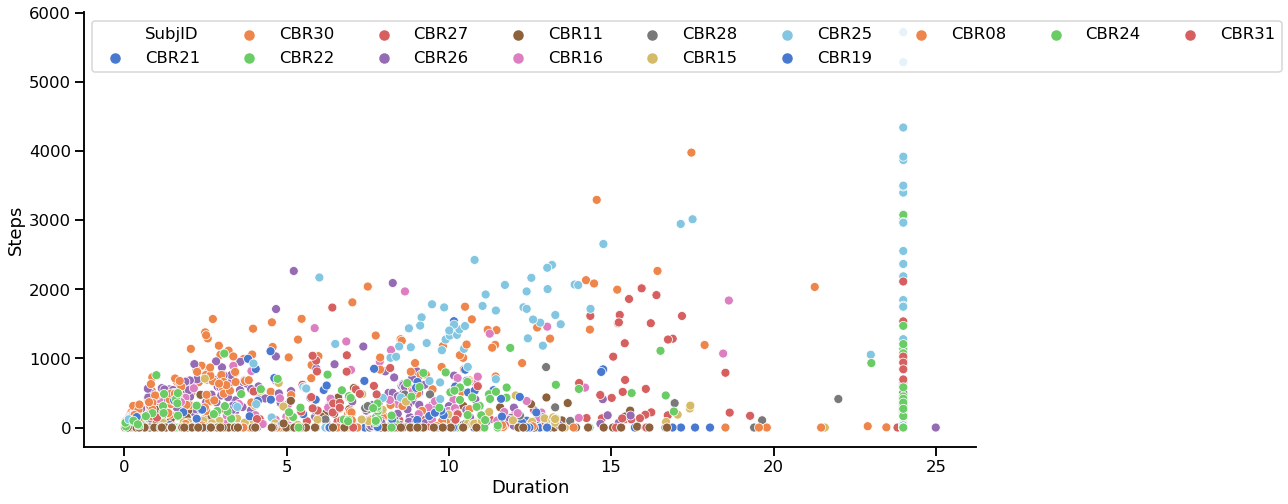

In [178]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(data=Datahome, x='Duration', y='Steps', hue='SubjID', palette="muted")
ax.legend(loc='upper left', ncol = 9)
sns.despine()

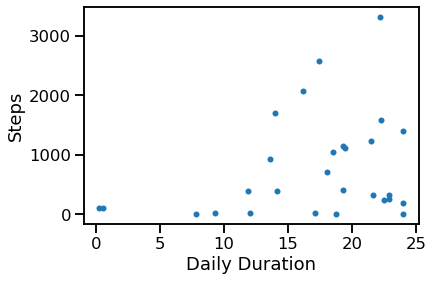

In [179]:
homedur[['Steps','Daily Duration']].plot.scatter(x='Daily Duration',y='Steps')
# plt.figure(figsize=(16,8))
# ax = sns.scatterplot(data=homedur, x='Daily Duration', y='Steps', hue='SubjID', palette="muted")
# ax.legend(loc='upper left', ncol = 9)
# sns.despine()

Is number of steps correlated with the time people spend outside? (i.e. are they walking when they are in the community?)

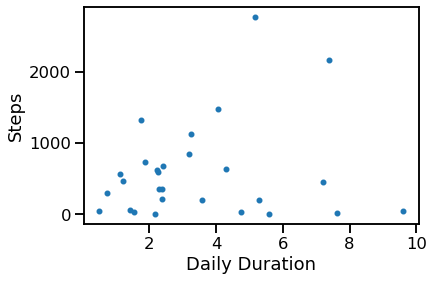

In [180]:
dur[['Steps','Daily Duration']].plot.scatter(x='Daily Duration',y='Steps')

## Mobility and clinical features correlations - Personal and C-brace

In [233]:
Featsubj = dur.query('NewBrace==0')
Featsubj.reset_index(drop=True, inplace=True)
Featsubj.head()

,SubjID,Duration_Mean,Duration_Median,Wear Fraction,NewBrace,6MWT,10mwt_ss,Steps,Cadence,Time Community,Age,BaselineYrs,Loc
0,CBR21,1.004105,0.341667,0.556706,0,246.46,0.70,287.354839,0.352186,2.753190,65.0,60.0,Community
1,CBR30,0.595975,0.329444,0.963416,0,333.45,0.99,1409.720000,0.346835,4.386378,55.0,37.0,Community
2,CBR22,1.420190,0.368056,0.747057,0,313.69,0.93,173.090909,0.259792,4.906111,28.0,2.0,Community
3,CBR27,0.367698,0.122222,0.981146,0,119.18,0.44,38.625000,0.130492,0.965208,72.0,70.0,Community
4,CBR26,0.424357,0.228333,0.986583,0,443.20,1.22,2535.647059,0.404747,5.192132,52.0,0.5,Community


In [234]:
#add OPUS data
OPUSdata= pd.read_excel('./Clinical Measures/OPUS.xlsx')
sid = OPUSdata.SubjID
newstr = []
for s in sid.values:
    newstr.append(s.replace('-',''))
OPUSdata.SubjID = newstr

In [235]:
Featsubj=pd.merge(Featsubj,OPUSdata.query('NewBrace==0'),on=['SubjID', 'NewBrace'])
Featsubj=Featsubj[['SubjID','NewBrace','Age','BaselineYrs','6MWT','10mwt_ss','OPUS','Steps','Cadence','Wear Fraction',
                   'Time Community']]

In [236]:
# Featsubj.rename(columns={'Daily Duration':'Time Community','6mwt':'6MWT'},inplace=True)
Featsubj.head()

,SubjID,NewBrace,Age,BaselineYrs,6MWT,10mwt_ss,OPUS,Steps,Cadence,Wear Fraction,Time Community
0,CBR21,0,65.0,60.0,246.46,0.70,49.59,287.354839,0.352186,0.556706,2.753190
1,CBR30,0,55.0,37.0,333.45,0.99,45.66,1409.720000,0.346835,0.963416,4.386378
2,CBR22,0,28.0,2.0,313.69,0.93,43.94,173.090909,0.259792,0.747057,4.906111
3,CBR27,0,72.0,70.0,119.18,0.44,75.87,38.625000,0.130492,0.981146,0.965208
4,CBR26,0,52.0,0.5,443.20,1.22,39.93,2535.647059,0.404747,0.986583,5.192132


In [237]:
Featsubj['Age']=Featsubj.Age.astype('int')

In [238]:
cmap = sns.diverging_palette(300, 20, 0, 50)

In [240]:
#C-brace
FeatsubjCBR = dur.query('NewBrace==1')
FeatsubjCBR.head()
FeatsubjCBR.reset_index(drop=True, inplace=True)
FeatsubjCBR=pd.merge(FeatsubjCBR, OPUSdata.query('NewBrace==1'),on=['SubjID', 'NewBrace'])
FeatsubjCBR=FeatsubjCBR[['SubjID','NewBrace','Age','BaselineYrs','6mwt','10mwt_ss','OPUS','Steps','Cadence','Wear Fraction',
                   'Daily Duration']]
# FeatsubjCBR.rename(columns={'Daily Duration':'Time Community','6mwt':'6MWT'},inplace=True)

KeyError: "['6mwt', 'Daily Duration'] not in index"

In [117]:
def getPLabels(corr,raw):
    
    p_labels = []
    
    for i in corr.index:
        for c in corr.columns:
            if c==i:
                p_labels.append('')
                continue
            ff = raw[[i,c]].dropna()
            r = pearsonr(ff[i],ff[c])
            v = r[0]
            
            sig = ''
            if r[1]<.05:
                sig += '*'
            if r[1]<.01:
                sig+= '*'
            p_labels.append('{:.2f}'.format(v)+sig)
            
    p_labels = np.asarray(p_labels).reshape(corr.shape)
    
    return p_labels
    

In [134]:
# #subplots
# fcorr = Featsubj.drop(['NewBrace','SubjID'],axis=1)[['Wear Fraction','Steps','Cadence','Time Community',
#                                                      '6MWT','10mwt_ss','OPUS','Age','BaselineYrs']].corr()
# fcorr = fcorr.loc[['6MWT', '10mwt_ss', 'OPUS', 'Age', 'BaselineYrs'],:]
# fcorr = fcorr.loc[:,['Steps', 'Cadence', 'Time Community', 'Wear Fraction', '6MWT', '10mwt_ss', 'OPUS', 'Age']].copy()

# #generate annotations with markers of statistical significance
# p_labels=getPLabels(fcorr,Featsubj)

# #insert blank rows for gap
# fcorr.insert(4,'Fill_1', np.nan)
# fcorr.insert(5,'Fill_2', np.nan)

# fill = np.array([np.nan]*5)
# fill.shape = (5,1)
# p_labels = np.hstack([p_labels[:,:4], fill, fill, p_labels[:,4:]])

# #generate an triangular correlation matrix
# mask = np.zeros_like(fcorr, dtype=np.bool)
# mask[np.triu_indices_from(mask,k=6)] = True #k is used for offset for rectangular matrix
# cmap = sns.diverging_palette(275, 45, 80, 70, as_cmap=True)
# sns.set_context('notebook',font_scale=1.3)

# fig, ax = plt.subplots(2,1, figsize=(10,10))
# sns.heatmap(data=fcorr,mask=mask,cmap=cmap,annot=p_labels,fmt='',square=True, vmin=-1, vmax=1, cbar=False, linewidths=3,
#            ax=ax[0],annot_kws={"size": 14})
# ax[0].set_title('Personal device',size=20)
# ax[0].tick_params(labelbottom=False,bottom=False)

# #C-brace
# FeatsubjCBR = dur.query('NewBrace==1')
# FeatsubjCBR.head()
# FeatsubjCBR.reset_index(drop=True, inplace=True)
# FeatsubjCBR=pd.merge(FeatsubjCBR, OPUSdata.query('NewBrace==1'),on=['SubjID', 'NewBrace'])
# FeatsubjCBR=FeatsubjCBR[['SubjID','NewBrace','Age','BaselineYrs','6mwt','10mwt_ss','OPUS','Steps','Cadence','Wear Fraction',
#                    'Daily Duration']]
# FeatsubjCBR.rename(columns={'Daily Duration':'Time Community', '6mwt':'6MWT'},inplace=True)

# fcorrCBR = FeatsubjCBR.drop(['NewBrace','SubjID'],axis=1)[['Wear Fraction','Steps','Cadence','Time Community',
#                                                      '6MWT','10mwt_ss','OPUS','Age','BaselineYrs']].corr()
# fcorrCBR = fcorr.loc[['6MWT', '10mwt_ss', 'OPUS', 'Age', 'BaselineYrs'],:]
# fcorrCBR = fcorr.loc[:,['Steps', 'Cadence', 'Time Community', 'Wear Fraction', '6MWT', '10mwt_ss', 'OPUS', 'Age']].copy()

# #generate annotations with markers of statistical significance
# p_labels=getPLabels(fcorrCBR,FeatsubjCBR)

# #insert blank rows for gap
# fcorrCBR.insert(4,'Fill_1', np.nan)
# fcorrCBR.insert(5,'Fill_2', np.nan)

# fill = np.array([np.nan]*5)
# fill.shape = (5,1)
# p_labels = np.hstack([p_labels[:,:4], fill, fill, p_labels[:,4:]])

# #generate an triangular correlation matrix
# mask = np.zeros_like(fcorrCBR, dtype=np.bool)
# mask[np.triu_indices_from(mask,k=6)] = True #k is used for offset for rectangular matrix (set to 4+# of fill columns)
# cmap = sns.diverging_palette(275, 45, 80, 70, as_cmap=True)
# sns.heatmap(data=fcorrCBR,mask=mask,cmap=cmap,annot=p_labels,fmt='',square=True, vmin=-1, vmax=1, cbar=False, linewidths=3,
#            ax=ax[1],annot_kws={"size": 14})
# ax[1].set_title('Novel device',size=20)
# xticks = ax[1].xaxis.get_major_ticks()
# xticks[4].set_visible(False) # remove labels for fill columns
# xticks[5].set_visible(False)
# plt.tight_layout()
# # plt.savefig('./Figs/corr_pers_cbr.png',dpi=400)

In [124]:
ax

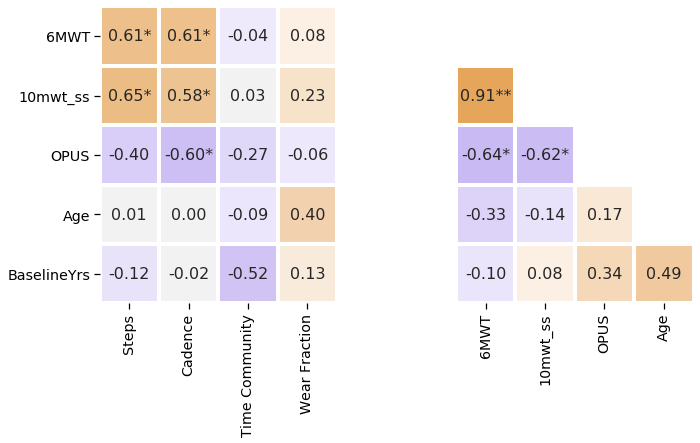

In [673]:
#subplots
fcorr = Featsubj.drop(['NewBrace','SubjID'],axis=1)[['Wear Fraction','Steps','Cadence','Time Community',
                                                     '6MWT','10mwt_ss','OPUS','Age','BaselineYrs']].corr()
fcorr = fcorr.loc[['6MWT', '10mwt_ss', 'OPUS', 'Age', 'BaselineYrs'],:]
fcorr = fcorr.loc[:,['Steps', 'Cadence', 'Time Community', 'Wear Fraction', '6MWT', '10mwt_ss', 'OPUS', 'Age']].copy()

#generate annotations with markers of statistical significance
p_labels=getPLabels(fcorr,Featsubj)

#insert blank rows for gap
fcorr.insert(4,'Fill_1', np.nan)
fcorr.insert(5,'Fill_2', np.nan)

fill = np.array([np.nan]*5)
fill.shape = (5,1)
p_labels = np.hstack([p_labels[:,:4], fill, fill, p_labels[:,4:]])

#generate an triangular correlation matrix
mask = np.zeros_like(fcorr, dtype=np.bool)
mask[np.triu_indices_from(mask,k=6)] = True #k is used for offset for rectangular matrix
cmap = sns.diverging_palette(275, 45, 80, 70, as_cmap=True)
sns.set_context('notebook',font_scale=1.3)

fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(data=fcorr,mask=mask,cmap=cmap,annot=p_labels,fmt='',square=True, vmin=-1, vmax=1, cbar=False, linewidths=3,
           ax=ax,annot_kws={"size": 16})
# ax.set_title('Personal device',size=20)
xticks = ax.xaxis.get_major_ticks()
xticks[4].set_visible(False) # remove labels for fill columns
xticks[5].set_visible(False)
# ax.tick_params(labelbottom=False,bottom=False)
plt.tight_layout()
plt.savefig('/Users/luca/Dropbox/CbraceGPSPaper/Review/Figs/Fig3.jpg',  dpi=300)

In [145]:
print('\n PERSONAL')
for x,y in itertools.combinations(Featsubj.drop('SubjID',axis=1).columns,2):
    ff = Featsubj[[x,y]].dropna()
    r = pearsonr(ff[x],ff[y])
    if r[1]<.9:
        print(x,y,r, r[0]**2)  
# print('\n CBRACE')
# for x,y in itertools.combinations(FeatsubjCBR.drop('SubjID',axis=1).columns,2):
#     ff = FeatsubjCBR[[x,y]].dropna()
#     r = pearsonr(ff[x].dropna(),ff[y].dropna())
#     if r[1]<.9:
#         print(x,y,r, r[0]**2)


 PERSONAL
Age BaselineYrs (0.4948823077551434, 0.07199897451484392) 0.24490849852905647
Age 6MWT (-0.20077655763972374, 0.4912910741553655) 0.04031122609765731
Age 10mwt_ss (-0.1356199053071916, 0.6438816650427341) 0.018392758715531615
Age OPUS (0.16513068988704813, 0.572649518372915) 0.02726814474257246
Age Wear Fraction (0.40345176068697347, 0.1525738665444809) 0.1627733232014189
Age Time Community (-0.07432270395786866, 0.800646167566693) 0.005523864323608987
BaselineYrs 6MWT (-0.09352730965986697, 0.750471259331888) 0.008747357652212646
BaselineYrs 10mwt_ss (0.08309738311946294, 0.7776202741568423) 0.006905175081302803
BaselineYrs OPUS (0.3432794191235857, 0.22950757525348298) 0.11784075959382644
BaselineYrs Steps (-0.11736693707930133, 0.6894588680162497) 0.013774997919376678
BaselineYrs Wear Fraction (0.12582648243528252, 0.6682028392691446) 0.01583230368203646
BaselineYrs Time Community (-0.5388169397428711, 0.04680272568299014) 0.29032369455387286
6MWT 10mwt_ss (0.911526551094

In [146]:
r

(-0.41694928269420795, 0.1380293899104282)

## Deep dive into correlations

0 ('6mwt', 'Steps')


KeyError: '6mwt'

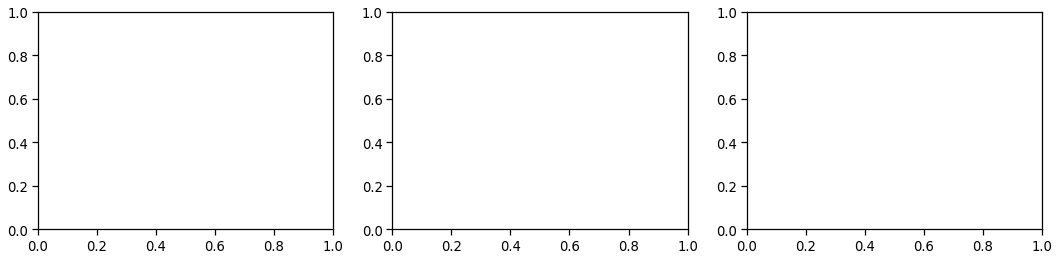

In [195]:
fig, ax = plt.subplots(1,3, figsize=(18,4))
for i,(x,y) in enumerate(zip(['6MWT','10mwt_ss','OPUS'],['Steps','Cadence','Wear Fraction'])):
    print(i,(x,y))
    sns.regplot(x=x, y=y, data=Featsubj, ax=ax[i])
    sns.despine()
    


In [ ]:

#fit linear model on steps 


#compute error for each 

In [ ]:
Featsubj.columns

Some correlations are driven by few outliers - so not meaningful - see below, as well as OPUS vs. Cadence

In [ ]:
sns.scatterplot(x='Time Community', y='Wear Fraction', data=Featsubj)

In [ ]:
sns.set_context('talk')
sns.pairplot(data=Featsubj[['Age','BaselineYrs','6mwt','OPUS','Wear Fraction','Cadence','Time Community']],corner=True)

In [196]:
# from scipy.stats import iqr

# plt.figure(figsize=(15,6))
# plt.subplot(121)
# ax=sns.boxplot(x='NewBrace',y='6mWT',data=Fboth,hue='NewBrace')
# ax.legend_.remove()
# plt.xlabel('Device')
# plt.xticks(np.arange(2),('Personal','C-brace'))
# plt.subplot(122)
# ax=sns.boxplot(x='NewBrace',y='10mWTss',data=Fboth,hue='NewBrace')
# plt.xticks(np.arange(2),('Personal','C-brace'))
# ax.legend_.remove()
# #paired t-test
# from scipy.stats import ttest_rel, shapiro
# for f in ['6mWT','10mWTss']:
#     x = Featsubj[f]
#     y = FeatsubjCBR[f]
#     tstat,prob = ttest_rel(x,y)
#     print(f,tstat,prob)
#     print(np.median(x),np.median(y))
#     print(np.percentile(x,25),np.percentile(x,75),np.percentile(y,25),np.percentile(y,75))
    


In [197]:
# confidence interval analysis

In [198]:
# F = Featsubj.drop(['NewBrace','SubjID'],axis=1)
# for i in F.columns:
#     for j in F.columns:
#         print(i,j)
#         x = Featsubj[i]
#         y = Featsubj[j]
#         print(pearsonr(x,y))

In [199]:
# f = 'UsageFrac'
# x = Fboth[Fboth['NewBrace']==0][f]
# y = Fboth[Fboth['NewBrace']==1][f]
# plt.figure(figsize=(8,6))
# plt.scatter(x,y)    
# mx=min(x)
# my=min(y)
# m = min(mx,my)
# Mx=max(x)
# My=max(y)
# M =max(Mx,My)
# plt.plot([m,M],[m,M])
# plt.title('Usage Fraction')
# plt.xlabel('Personal device')
# plt.xlabel('C-brace')

## (Cbrace - Baseline) mobility and clinical correlations
A positive change indicates C-brace is preferred

In [224]:
FeatsubjCBR = dur.query('NewBrace==1')
FeatsubjCBR.head()

,SubjID,Duration_Mean,Duration_Median,Wear Fraction,NewBrace,6MWT,10mwt_ss,Steps,Cadence,Time Community,Age,BaselineYrs,Loc
SubjID,,,,,,,,,,,,,
CBR21,CBR21,1.928765,0.661944,0.038358,1,231.93,0.69,6.954545,0.353914,5.873965,65.0,60.0,Community
CBR30,CBR30,1.001469,0.411111,0.955487,1,452.17,1.20,1918.230769,0.331321,6.702137,55.0,37.0,Community
CBR22,CBR22,2.207157,0.511111,0.621796,1,332.61,1.00,288.058824,0.265878,6.621471,28.0,2.0,Community
CBR27,CBR27,0.491389,0.491389,1.000000,1,133.60,0.46,51.000000,0.202273,0.491389,72.0,70.0,Community
CBR26,CBR26,0.536108,0.224167,0.945755,1,512.14,1.15,543.315789,0.326924,2.172646,52.0,0.5,Community


In [226]:
FeatsubjCBR.index.name = None
FeatsubjCBR=pd.merge(FeatsubjCBR, OPUSdata.query('NewBrace==1'),on=['SubjID', 'NewBrace'])
FeatsubjCBR=FeatsubjCBR[['SubjID','NewBrace','Age','BaselineYrs','6MWT','10mwt_ss','OPUS','Steps','Cadence','Wear Fraction',
                   'Time Community']]
# FeatsubjCBR.rename(columns={'Daily Duration':'Time Community','6mwt':'6MWT'},inplace=True)

KeyError: "['OPUS'] not in index"

CBR 15 never worn the Cbrace - check

In [244]:
Featsubj.index = Featsubj['SubjID']
Featsubj.drop(columns='SubjID',inplace=True)
FeatsubjCBR.index = FeatsubjCBR['SubjID']
FeatsubjCBR.drop(columns='SubjID',inplace=True)

In [245]:
#feature difference
F = FeatsubjCBR.copy()
F = (FeatsubjCBR.drop(['NewBrace','Age','BaselineYrs'],axis=1)
     -Featsubj.drop(['NewBrace','Age','BaselineYrs'],axis=1))
Fdiff = pd.concat((F,Featsubj[['Age','BaselineYrs']]),axis=1)

#reorder
Fdiff=Fdiff[['Wear Fraction','Steps','Cadence','Time Community','6MWT','10mwt_ss','OPUS','Age','BaselineYrs']]

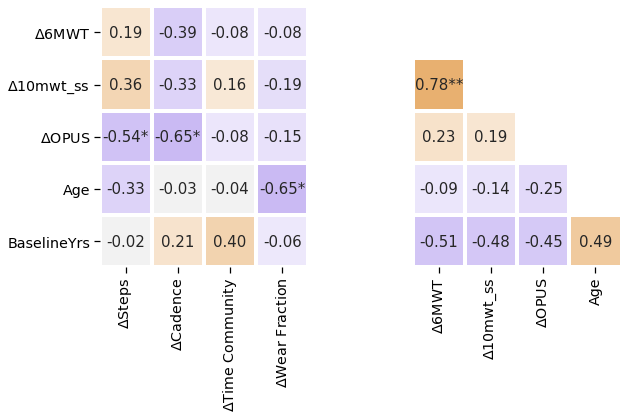

In [246]:
Fdiff.rename(columns={'Steps': r'$\Delta$Steps', 'Wear Fraction': r'$\Delta$Wear Fraction', 'Cadence':r'$\Delta$Cadence',
                      'Time Community': r'$\Delta$Time Community', '6MWT': r'$\Delta$6MWT', 
                      '10mwt_ss': r'$\Delta$10mwt_ss', 'OPUS': r'$\Delta$OPUS'}, inplace=True)

fcorr = Fdiff[[r'$\Delta$Wear Fraction', r'$\Delta$Steps', r'$\Delta$Time Community',r'$\Delta$Cadence', 
               r'$\Delta$6MWT', r'$\Delta$10mwt_ss', r'$\Delta$OPUS', 'Age', 'BaselineYrs']].corr()
fcorr = fcorr.loc[[r'$\Delta$6MWT', r'$\Delta$10mwt_ss', r'$\Delta$OPUS', 'Age', 'BaselineYrs'],:]
fcorr = fcorr.loc[:,[r'$\Delta$Steps', r'$\Delta$Cadence', r'$\Delta$Time Community',r'$\Delta$Wear Fraction', 
                     r'$\Delta$6MWT', r'$\Delta$10mwt_ss', r'$\Delta$OPUS', 'Age']].copy()

#generate annotations with markers of statistical significance
p_labels=getPLabels(fcorr,Fdiff)

#insert blank rows for gap
fcorr.insert(4,'Fill_1', np.nan)
fcorr.insert(5,'Fill_2', np.nan)

fill = np.array([np.nan]*5)
fill.shape = (5,1)
p_labels = np.hstack([p_labels[:,:4], fill, fill, p_labels[:,4:]])

#generate an triangular correlation matrix
mask = np.zeros_like(fcorr, dtype=np.bool)
mask[np.triu_indices_from(mask,k=6)] = True #k is used for offset for rectangular matrix
cmap = sns.diverging_palette(275, 45, 80, 70, as_cmap=True)

sns.set_context('notebook',font_scale=1.3)
fig, ax = plt.subplots(1,1, figsize=(9,6))
sns.heatmap(data=fcorr,mask=mask,cmap=cmap,annot=p_labels,fmt='',square=True, vmin=-1, vmax=1, cbar=False, linewidths=3,
           ax=ax,annot_kws={"size": 15})
xticks = ax.xaxis.get_major_ticks()
xticks[4].set_visible(False) # remove labels for fill columns
xticks[5].set_visible(False)
plt.tight_layout()
# plt.title('Pearson r - Difference Features between C-brace and Personal device')
# plt.savefig('./Figs/corr_diff.png',dpi=400)

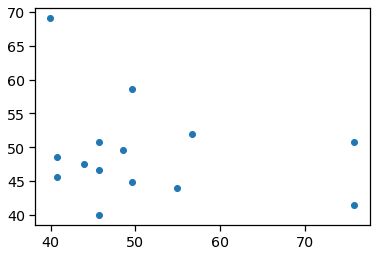

In [249]:
plt.scatter(Featsubj['OPUS'],FeatsubjCBR['OPUS'])

In [ ]:
# Fdiff.rename(columns={'Steps': r'$\Delta$Steps', 'Wear Fraction': r'$\Delta$Wear Fraction', 'Cadence':r'$\Delta$Cadence',
#                       'Time Community': r'$\Delta$Time Community', '6mwt': r'$\Delta$6mwt', 
#                       '10mwt_ss': r'$\Delta$10mwt_ss', 'OPUS': r'$\Delta$OPUS'}, inplace=True)
# fcorr = Fdiff.drop(['SubjID'],axis=1).corr()

# mask = np.zeros_like(fcorr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# cmap = sns.diverging_palette(275, 45, 80, 70, as_cmap=True)
# sns.set_context('notebook',font_scale=1.5)
# plt.figure(figsize=(12,10))
# sns.heatmap(data=fcorr,mask=mask,cmap=cmap,annot=True,fmt='.2f',square=True, vmin=-1, vmax=1)
# sns.set_context('talk',font_scale=1)
# plt.tight_layout()
# plt.savefig('./Figs/DiffCorr.jpg', dpi=400)
# # plt.title('Pearson r - Difference Features between C-brace and Personal device')

In [124]:
Fdiff.fillna(value=0,inplace=True)

In [125]:
sigfeat = []
for x,y in itertools.combinations(Fdiff.columns,2):
    r = pearsonr(Fdiff[x],Fdiff[y])
    if r[1]<.05:
        print(x,y,r)
        sigfeat.append((x,y))        

$\Delta$Wear Fraction Age (-0.6465441425752811, 0.01246763210757784)
$\Delta$Steps $\Delta$OPUS (-0.5413183187126185, 0.045595342067454823)
$\Delta$Cadence $\Delta$OPUS (-0.6434559155446266, 0.013035421812560323)
$\Delta$6mwt $\Delta$10mwt_ss (0.7755526060634168, 0.0011158486693564462)


* Younger participants wear the c-brace more
* Participants who rated higher the c-brace had lower change in cadence or steps (high performing ones?)

Text(0, 0.5, '$\\Delta$OPUS')

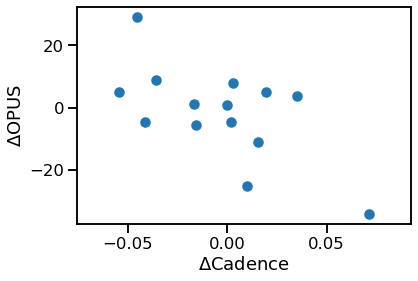

In [191]:
x,y = sigfeat[-2]
xd = Fdiff[x]; yd = Fdiff[y]
plt.scatter(x=xd, y=yd)
plt.xlabel(x); plt.ylabel(y)

As above, these correlations are driven by outliers and should not used to conclude anything

# Paper Revision

In [629]:
Data = pd.read_csv('../Data/GPSandClinicalData.csv')
#compute mean duration/day feature across days for each participant
dur = mean_daily_features(Data)

/Users/luca/Projects/CbraceGPS/CbrAnalysis/HelperFcns.py:16: RuntimeWarning: Mean of empty slice
  cadence = np.nanmean(d['Cadence'])
/Users/luca/Projects/CbraceGPS/CbrAnalysis/HelperFcns.py:31: RuntimeWarning: Mean of empty slice
  meandailycadence = np.nanmean(dailycadence)


In [630]:
#aggregate home and community
# homedur['Loc']='Home'
dur['Loc']='Community'
# durdata = pd.concat([homedur,dur])

#fix 6mwt errror
dur.loc[(dur.SubjID=="CBR08") & (dur.NewBrace==0),'6mwt'] = 199.92
dur.loc[(dur.SubjID=="CBR27") & (dur.NewBrace==0),'6mwt'] = 78.82

In [631]:
#To Check 6mwt errors
# dur2 = dur.query('NewBrace==1').set_index('SubjID').sort_index()[['6mwt']]
# clinical = pd.read_csv('./Clinical Measures/6mwt.csv')
# # clinical = clinical[['SubjID','Bas']].set_index('SubjID')
# clinical = clinical[['SubjID','Cbr']].set_index('SubjID')
# pd.merge(clinical,dur2,left_index=True, right_index=True)


In [632]:
dur.query('NewBrace==0').describe()

,Duration_Mean,Duration_Median,Wear Fraction,6mwt,10mwt_ss,Steps,Cadence,Daily Duration,Age,BaselineYrs
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.958389,0.337877,0.788744,259.825000,0.714286,561.410583,0.296780,3.913304,54.000000,25.797143
std,0.709561,0.179718,0.289553,106.004332,0.271682,685.781471,0.081862,2.906356,14.071247,27.539645
min,0.367698,0.122222,0.022178,78.820000,0.380000,17.666667,0.130492,0.965208,28.000000,0.080000
25%,0.530256,0.215417,0.627471,169.267500,0.465000,164.189394,0.262039,2.167682,44.000000,0.625000
50%,0.747671,0.310556,0.949351,272.530000,0.675000,366.748848,0.318106,3.197855,53.500000,17.500000
75%,1.016689,0.374097,0.962359,328.510000,0.912500,655.354412,0.340609,4.776178,67.250000,47.250000
max,3.107292,0.746667,1.000000,443.200000,1.220000,2535.647059,0.418491,12.429167,72.000000,70.000000


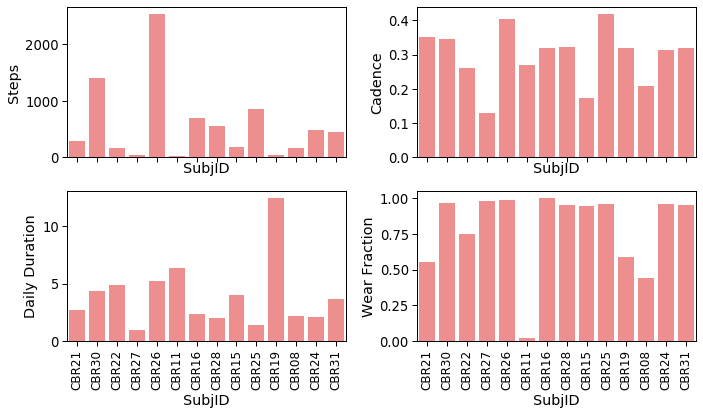

In [633]:
#daily averages
fig,ax = plt.subplots(2,2, figsize=(10,6), sharex=True); ax = ax.ravel()
for i,f in enumerate(['Steps','Cadence','Daily Duration','Wear Fraction']):
    df = dur.query('NewBrace==0 & Loc=="Community"')[[f,'SubjID']]
    sns.barplot(x='SubjID',y=f,data=df, color='r', ax=ax[i], alpha=.5)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation='vertical', fontsize=12)
plt.tight_layout()
plt.savefig('/Users/luca/Dropbox/CbraceGPSPaper/Review/Figs/Fig2.jpg',  dpi=300)

In [634]:
def scatterplot_2(data,x,y,ax,hue=None,legend=None):
    tol = 0.1
    sns.scatterplot(x, y, data=data, hue=hue, legend=legend, alpha=.7, ax=ax)
    sns.despine()
    minval = min(min(data[x]),min(data[y])); maxval = max(max(data[x]), max(data[y]))    
    ax.plot([minval,maxval],[minval, maxval],c='gray',linestyle='--', alpha=.5)

In [635]:
dur.index = dur.SubjID
dur.rename(columns={'Daily Duration':'Time Community','6mwt':'6MWT'},inplace=True)

In [636]:
# fig,ax = plt.subplots(3,2, figsize=(10,10)); ax = ax.ravel()
# for i,f in enumerate(['Steps','Cadence','Wear Fraction','Time Community','6MWT','10mwt_ss']):
#     x = dur.query('NewBrace==0')[f]
#     y = dur.query('NewBrace==1')[f]
#     sd_x = x.std(); sd_y = y.std()
#     minval = min(min(x),min(y)); maxval = max(max(x), max(y))    
#     sns.scatterplot(x, y, hue=x.index, s=120, legend=None, alpha=.6, ax=ax[i])
#     ax[i].plot([minval,maxval],[minval, maxval],c='gray',linestyle='--', alpha=.5)
#     xy = pd.DataFrame({'x':x,'y':y})
#     xy.dropna(inplace=True)
#     r,p = pearsonr(xy.x,xy.y)
# #     ax[i].set_title(f'r={round(r,3)}, p={round(p,6)}')
#     ax[i].set_xlabel(ax[i].get_xlabel()+'\nPersonal')
#     ax[i].set_ylabel(ax[i].get_ylabel()+'\nNovel')
# #     ax[i].grid()
# plt.tight_layout()
# sns.despine()
# plt.savefig('/Users/luca/Dropbox/CbraceGPSPaper/Review/Figs/Figs3.jpg',  dpi=300)

## Fig 3 and 4

In [662]:
#features Personal and Cbrace
Featsubj = dur.query('NewBrace==0')
Featsubj.reset_index(drop=True, inplace=True)
#add OPUS data
OPUSdata= pd.read_excel('./Clinical Measures/OPUS.xlsx')
sid = OPUSdata.SubjID
newstr = []
for s in sid.values:
    newstr.append(s.replace('-',''))
OPUSdata.SubjID = newstr

Featsubj=pd.merge(Featsubj,OPUSdata.query('NewBrace==0'),on=['SubjID', 'NewBrace'])
Featsubj=Featsubj[['SubjID','NewBrace','Age','BaselineYrs','6MWT','10mwt_ss','OPUS','Steps','Cadence','Wear Fraction',
                   'Time Community']]
Featsubj['Age']=Featsubj.Age.astype('int')

#C-brace
FeatsubjCBR = dur.query('NewBrace==1')
FeatsubjCBR.reset_index(drop=True, inplace=True)
FeatsubjCBR=pd.merge(FeatsubjCBR, OPUSdata.query('NewBrace==1'),on=['SubjID', 'NewBrace'])
FeatsubjCBR=FeatsubjCBR[['SubjID','NewBrace','Age','BaselineYrs','6MWT','10mwt_ss','OPUS','Steps','Cadence','Wear Fraction',
                   'Time Community']]


In [663]:
Featsubj.head()

,SubjID,NewBrace,Age,BaselineYrs,6MWT,10mwt_ss,OPUS,Steps,Cadence,Wear Fraction,Time Community
0,CBR21,0,65,60.0,246.46,0.70,49.59,287.354839,0.352186,0.556706,2.753190
1,CBR30,0,55,37.0,333.45,0.99,45.66,1409.720000,0.346835,0.963416,4.386378
2,CBR22,0,28,2.0,313.69,0.93,43.94,173.090909,0.259792,0.747057,4.906111
3,CBR27,0,72,70.0,78.82,0.44,75.87,38.625000,0.130492,0.981146,0.965208
4,CBR26,0,52,0.5,443.20,1.22,39.93,2535.647059,0.404747,0.986583,5.192132


In [664]:
cmap = sns.diverging_palette(300, 20, 0, 50)

In [690]:
def getPLabels(corr,raw):
    
    p_labels = []
    
    for i in corr.index:
        for c in corr.columns:
            if c==i:
                p_labels.append('')
                continue
            ff = raw[[i,c]].dropna()
            r = pearsonr(ff[i],ff[c])
            v = r[0]
            
            sig = ''
            if r[1]<.05:
                sig += '*'
            if r[1]<.01:
                sig+= '*'
            p_labels.append('{:.2f}'.format(v)+sig)
            
    p_labels = np.asarray(p_labels).reshape(corr.shape)
    
    return p_labels
    

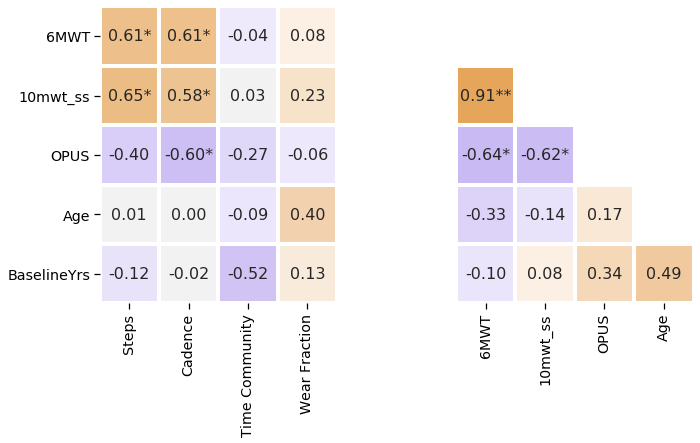

In [674]:
#subplots
fcorr = Featsubj.drop(['NewBrace','SubjID'],axis=1)[['Wear Fraction','Steps','Cadence','Time Community',
                                                     '6MWT','10mwt_ss','OPUS','Age','BaselineYrs']].corr()
fcorr = fcorr.loc[['6MWT', '10mwt_ss', 'OPUS', 'Age', 'BaselineYrs'],:]
fcorr = fcorr.loc[:,['Steps', 'Cadence', 'Time Community', 'Wear Fraction', '6MWT', '10mwt_ss', 'OPUS', 'Age']].copy()

#generate annotations with markers of statistical significance
p_labels=getPLabels(fcorr,Featsubj)

#insert blank rows for gap
fcorr.insert(4,'Fill_1', np.nan)
fcorr.insert(5,'Fill_2', np.nan)

fill = np.array([np.nan]*5)
fill.shape = (5,1)
p_labels = np.hstack([p_labels[:,:4], fill, fill, p_labels[:,4:]])

#generate an triangular correlation matrix
mask = np.zeros_like(fcorr, dtype=np.bool)
mask[np.triu_indices_from(mask,k=6)] = True #k is used for offset for rectangular matrix
cmap = sns.diverging_palette(275, 45, 80, 70, as_cmap=True)
sns.set_context('notebook',font_scale=1.3)

fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(data=fcorr,mask=mask,cmap=cmap,annot=p_labels,fmt='',square=True, vmin=-1, vmax=1, cbar=False, linewidths=3,
           ax=ax,annot_kws={"size": 16})
# ax.set_title('Personal device',size=20)
xticks = ax.xaxis.get_major_ticks()
xticks[4].set_visible(False) # remove labels for fill columns
xticks[5].set_visible(False)
# ax.tick_params(labelbottom=False,bottom=False)
plt.tight_layout()
plt.savefig('/Users/luca/Dropbox/CbraceGPSPaper/Review/Figs/Fig3.jpg',  dpi=300)

In [678]:
Featsubj.corr()

,Age,BaselineYrs,6MWT,10mwt_ss,OPUS,Steps,Cadence,Wear Fraction,Time Community
Age,1.000000,0.494882,-0.328208,-0.135620,0.165131,0.009323,0.002355,0.403452,-0.090042
BaselineYrs,0.494882,1.000000,-0.103783,0.083097,0.343279,-0.117367,-0.015588,0.125826,-0.520793
6MWT,-0.328208,-0.103783,1.000000,0.905964,-0.642946,0.613875,0.606774,0.081460,-0.044561
10mwt_ss,-0.135620,0.083097,0.905964,1.000000,-0.620666,0.653407,0.576254,0.230849,0.033196
OPUS,0.165131,0.343279,-0.642946,-0.620666,1.000000,-0.395673,-0.597788,-0.056760,-0.266857
Steps,0.009323,-0.117367,0.613875,0.653407,-0.395673,1.000000,0.632799,0.450827,-0.058339
Cadence,0.002355,-0.015588,0.606774,0.576254,-0.597788,0.632799,1.000000,0.167687,0.122155
Wear Fraction,0.403452,0.125826,0.081460,0.230849,-0.056760,0.450827,0.167687,1.000000,-0.402455
Time Community,-0.090042,-0.520793,-0.044561,0.033196,-0.266857,-0.058339,0.122155,-0.402455,1.000000


In [676]:
print('\n PERSONAL')
for x,y in itertools.combinations(Featsubj.drop('SubjID',axis=1).columns,2):
    ff = Featsubj[[x,y]].dropna()
    r = pearsonr(ff[x],ff[y])
    if r[1]<.9:
        print(x,y,r)  


 PERSONAL
Age BaselineYrs (0.4948823077551434, 0.07199897451484392)
Age 6MWT (-0.328208420410007, 0.25194276672509325)
Age 10mwt_ss (-0.1356199053071916, 0.6438816650427341)
Age OPUS (0.16513068988704813, 0.572649518372915)
Age Wear Fraction (0.40345176068697347, 0.1525738665444809)
Age Time Community (-0.09004208985461498, 0.7595150492524547)
BaselineYrs 6MWT (-0.10378345598701566, 0.7240336881298632)
BaselineYrs 10mwt_ss (0.08309738311946294, 0.7776202741568423)
BaselineYrs OPUS (0.3432794191235857, 0.22950757525348298)
BaselineYrs Steps (-0.11736693707930133, 0.6894588680162497)
BaselineYrs Wear Fraction (0.12582648243528252, 0.6682028392691446)
BaselineYrs Time Community (-0.5207926838741701, 0.0562020141701087)
6MWT 10mwt_ss (0.9059640277157641, 8.130023606464133e-06)
6MWT OPUS (-0.6429463505217816, 0.01313097918797612)
6MWT Steps (0.6138753086973955, 0.019530598436075883)
6MWT Cadence (0.6067743893353285, 0.02140103676094944)
6MWT Wear Fraction (0.08145987722309092, 0.7819050225

In [642]:
Featsubj.index = Featsubj['SubjID']
Featsubj.drop(columns='SubjID',inplace=True)
FeatsubjCBR.index = FeatsubjCBR['SubjID']
FeatsubjCBR.drop(columns='SubjID',inplace=True)

In [643]:
#feature difference
F = FeatsubjCBR.copy()
F = (FeatsubjCBR.drop(['NewBrace','Age','BaselineYrs'],axis=1)
     -Featsubj.drop(['NewBrace','Age','BaselineYrs'],axis=1))
Fdiff = pd.concat((F,Featsubj[['Age','BaselineYrs']]),axis=1)

#reorder
Fdiff=Fdiff[['Wear Fraction','Steps','Cadence','Time Community','6MWT','10mwt_ss','OPUS','Age','BaselineYrs']]

In [644]:
Fdiff.head()

,Wear Fraction,Steps,Cadence,Time Community,6MWT,10mwt_ss,OPUS,Age,BaselineYrs
SubjID,,,,,,,,,
CBR21,-0.518348,-280.400293,0.001728,3.120775,-14.53,-0.01,-4.80,65,60.0
CBR30,-0.007929,508.510769,-0.015515,2.315759,118.72,0.21,-5.73,55,37.0
CBR22,-0.125261,114.967914,0.006086,1.715359,18.92,0.07,3.58,28,2.0
CBR27,0.018854,12.375000,0.071781,-0.473819,54.78,0.02,-34.36,72,70.0
CBR26,-0.040828,-1992.331269,-0.077824,-3.019486,68.94,-0.07,29.19,52,0.5


In [645]:
palette = (sns.diverging_palette(10,110,s=80,l=70, as_cmap=True))
 
# Use palplot and pass in the variable:
# sns.palplot(palette)
print(palette)

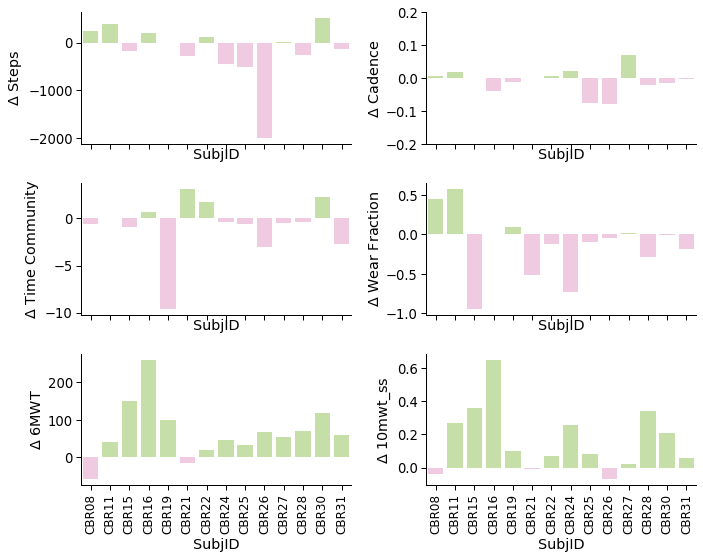

In [646]:
#Fig 4 Deltas 
sns.set_context('paper',font_scale=1.5)
fig,ax = plt.subplots(3,2, figsize=(10,8), sharex=True); ax = ax.ravel()
for i,f in enumerate(['Steps','Cadence','Time Community','Wear Fraction','6MWT','10mwt_ss']):
    df = pd.DataFrame(Fdiff[f].copy())
    df['increase'] = (df>0) 
    if f == 'Cadence':
        ax[i].set_ylim([-.2,.2])
    df.sort_index(inplace=True)
    g = sns.barplot(x=df.index, y=f, hue='increase', data=df, alpha=1, ax=ax[i], dodge=False, palette='PiYG')
    ax[i].set_ylabel('$\Delta$ '+f)
    ax[i].legend_.remove()
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation='vertical', fontsize=12)
sns.despine()
plt.tight_layout()
plt.savefig('/Users/luca/Dropbox/CbraceGPSPaper/Review/Figs/Fig4.jpg',  dpi=300)

In [672]:
Fdiff.sort_values('$\Delta$Wear Fraction')

,$\Delta$Wear Fraction,$\Delta$Steps,$\Delta$Cadence,$\Delta$Time Community,$\Delta$6MWT,$\Delta$10mwt_ss,$\Delta$OPUS,Age,BaselineYrs
SubjID,,,,,,,,,
CBR15,-0.943628,-180.000000,NaN,-0.952889,151.26,0.36,0.91,68,0.50
CBR24,-0.736965,-455.277778,0.021715,-0.379307,45.57,0.26,1.07,68,30.00
CBR21,-0.518348,-280.400293,0.001728,3.120775,-14.53,-0.01,-4.80,65,60.00
CBR28,-0.283602,-252.966667,-0.020158,-0.399500,69.40,0.34,-4.65,44,0.08
CBR31,-0.179471,-131.912088,-0.002932,-2.756409,59.62,0.06,7.80,51,50.00
CBR22,-0.125261,114.967914,0.006086,1.715359,18.92,0.07,3.58,28,2.00
CBR25,-0.099718,-519.129870,-0.076844,-0.580970,32.33,0.08,5.09,68,66.00
CBR26,-0.040828,-1992.331269,-0.077824,-3.019486,68.94,-0.07,29.19,52,0.50
CBR30,-0.007929,508.510769,-0.015515,2.315759,118.72,0.21,-5.73,55,37.00


In [651]:
Fdiff.describe()

,Wear Fraction,Steps,Cadence,Time Community,6MWT,10mwt_ss,OPUS,Age,BaselineYrs
count,14.000000,14.000000,13.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,-0.128113,-167.434072,-0.009352,-0.773698,67.787857,0.164286,-1.718571,54.000000,25.797143
std,0.407817,605.967639,0.040086,3.044604,76.137313,0.197356,15.260124,14.071247,27.539645
min,-0.943628,-1992.331269,-0.077824,-9.565278,-58.160000,-0.070000,-34.360000,28.000000,0.080000
25%,-0.257569,-273.541887,-0.020158,-0.870145,34.730000,0.030000,-5.497500,44.000000,0.625000
50%,-0.070273,-69.956044,-0.002932,-0.436660,57.200000,0.090000,0.990000,53.500000,17.500000
75%,0.014140,185.262567,0.006086,0.532051,92.275000,0.267500,5.052500,67.250000,47.250000
max,0.577433,508.510769,0.071781,3.120775,260.350000,0.650000,29.190000,72.000000,70.000000


Statistics=0.786, p=0.003
Steps Sample does not look Gaussian (reject H0)
Statistics=nan, p=1.000
Cadence Sample looks Gaussian (fail to reject H0)
Statistics=0.818, p=0.008
Time Community Sample does not look Gaussian (reject H0)
Statistics=0.947, p=0.513
Wear Fraction Sample looks Gaussian (fail to reject H0)
Statistics=0.926, p=0.269
6MWT Sample looks Gaussian (fail to reject H0)
Statistics=0.906, p=0.138
10mwt_ss Sample looks Gaussian (fail to reject H0)


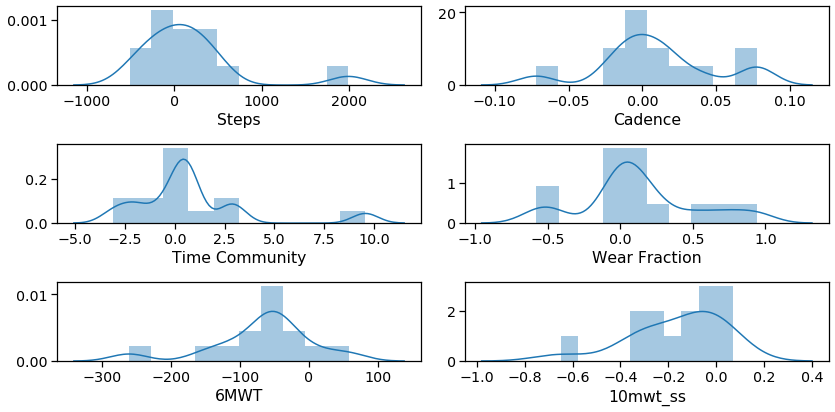

In [667]:
#Check Normality
feats = ['Steps','Cadence','Time Community','Wear Fraction','6MWT','10mwt_ss']
normality = []
fig,ax = plt.subplots(3,2, figsize=(12,6)); ax =ax.ravel()
for i,f in enumerate(feats):
    #CLINICAL
    x = dur[dur['NewBrace']==0][f]
    y = dur[dur['NewBrace']==1][f]
    stats,p = shapiro(x-y)
    print('Statistics=%.3f, p=%.3f' % (stats, p))
    alpha = .05
    if p > alpha:
        print(f'{f} Sample looks Gaussian (fail to reject H0)')
        normality.append(1)
    else:
        print(f'{f} Sample does not look Gaussian (reject H0)')
        normality.append(0)
    sns.distplot(x-y, ax=ax[i], bins=10)
plt.tight_layout()

In [668]:
#t-test and sign rank test differences
from scipy.stats import wilcoxon
# from scipy.stats import ttest_rel

SigProbs = []

#MOBILITY METRICS IN COMMUNITY
for f,norm in zip(feats, normality):
    x = dur[dur['NewBrace']==0][f]
    y = dur[dur['NewBrace']==1][f]
    if norm:
        tstat,prob = ttest_rel(x,y,nan_policy='omit')
    else:
        tstat,prob = wilcoxon(x,y)
    SigProbs.append(prob)
    print(f'{f}, tstat={tstat}, p={prob:.3f}, IQR={x.median():.2f}, {y.median():.2f}, normality={norm}')

Steps, tstat=40.0, p=0.433, IQR=366.75, 303.78, normality=0
Cadence, tstat=0.8412066716469992, p=0.417, IQR=0.32, 0.30, normality=1
Time Community, tstat=40.0, p=0.433, IQR=3.20, 2.52, normality=0
Wear Fraction, tstat=1.175417576097343, p=0.261, IQR=0.95, 0.72, normality=1
6MWT, tstat=-3.3313355175502934, p=0.005, IQR=272.53, 338.51, normality=1
10mwt_ss, tstat=-3.114677964743733, p=0.008, IQR=0.68, 0.91, normality=1


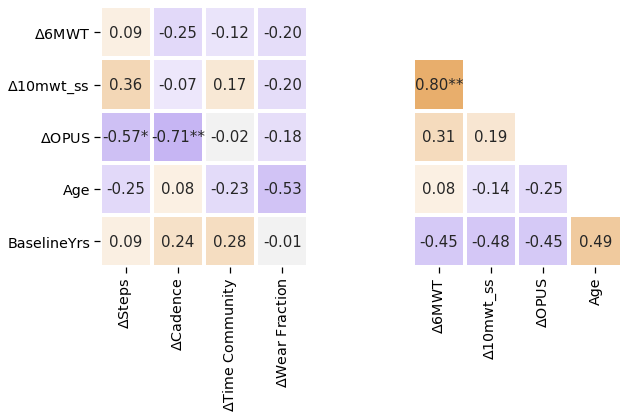

In [689]:
#FIG.5 Correlations on Deltas

Fdiff.rename(columns={'Steps': r'$\Delta$Steps', 'Wear Fraction': r'$\Delta$Wear Fraction', 'Cadence':r'$\Delta$Cadence',
                      'Time Community': r'$\Delta$Time Community', '6MWT': r'$\Delta$6MWT', 
                      '10mwt_ss': r'$\Delta$10mwt_ss', 'OPUS': r'$\Delta$OPUS'}, inplace=True)

fcorr = Fdiff[[r'$\Delta$Wear Fraction', r'$\Delta$Steps', r'$\Delta$Time Community',r'$\Delta$Cadence', 
               r'$\Delta$6MWT', r'$\Delta$10mwt_ss', r'$\Delta$OPUS', 'Age', 'BaselineYrs']].corr()
fcorr = fcorr.loc[[r'$\Delta$6MWT', r'$\Delta$10mwt_ss', r'$\Delta$OPUS', 'Age', 'BaselineYrs'],:]
fcorr = fcorr.loc[:,[r'$\Delta$Steps', r'$\Delta$Cadence', r'$\Delta$Time Community',r'$\Delta$Wear Fraction', 
                     r'$\Delta$6MWT', r'$\Delta$10mwt_ss', r'$\Delta$OPUS', 'Age']].copy()

#generate annotations with markers of statistical significance
p_labels=getPLabels(fcorr,Fdiff)

#insert blank rows for gap
fcorr.insert(4,'Fill_1', np.nan)
fcorr.insert(5,'Fill_2', np.nan)

fill = np.array([np.nan]*5)
fill.shape = (5,1)
p_labels = np.hstack([p_labels[:,:4], fill, fill, p_labels[:,4:]])

#generate an triangular correlation matrix
mask = np.zeros_like(fcorr, dtype=np.bool)
mask[np.triu_indices_from(mask,k=6)] = True #k is used for offset for rectangular matrix
cmap = sns.diverging_palette(275, 45, 80, 70, as_cmap=True)

sns.set_context('notebook',font_scale=1.3)
fig, ax = plt.subplots(1,1, figsize=(9,6))
sns.heatmap(data=fcorr,mask=mask,cmap=cmap,annot=p_labels,fmt='',square=True, vmin=-1, vmax=1, cbar=False, linewidths=3,
           ax=ax,annot_kws={"size": 15})
xticks = ax.xaxis.get_major_ticks()
xticks[4].set_visible(False) # remove labels for fill columns
xticks[5].set_visible(False)
plt.tight_layout()
# plt.title('Pearson r - Difference Features between C-brace and Personal device')
plt.savefig('/Users/luca/Dropbox/CbraceGPSPaper/Review/Figs/Fig5.jpg',  dpi=300)

In [680]:
Fdiff.fillna(value=0,inplace=True)

In [684]:
sigfeat = []
for x,y in itertools.combinations(Fdiff.columns,2):
    r = pearsonr(Fdiff[x],Fdiff[y])
    if r[1]<1:
        print(x,y,r)
        sigfeat.append((x,y))        

$\Delta$Wear Fraction $\Delta$Steps (0.2788511117940179, 0.3343320784267523)
$\Delta$Wear Fraction $\Delta$Cadence (-0.0143001964526734, 0.9613021118275722)
$\Delta$Wear Fraction $\Delta$Time Community (-0.147206332407189, 0.6155313687420607)
$\Delta$Wear Fraction $\Delta$6MWT (-0.19619377588757342, 0.5014381503809597)
$\Delta$Wear Fraction $\Delta$10mwt_ss (-0.1979863879908846, 0.497457560262495)
$\Delta$Wear Fraction $\Delta$OPUS (-0.1811869021202775, 0.5353249555552647)
$\Delta$Wear Fraction Age (-0.5293103617375525, 0.05160467421062892)
$\Delta$Wear Fraction BaselineYrs (-0.010721513015066714, 0.9709820889079546)
$\Delta$Steps $\Delta$Cadence (0.537709512528443, 0.04734464518327665)
$\Delta$Steps $\Delta$Time Community (0.24648200072622042, 0.39561002204306045)
$\Delta$Steps $\Delta$6MWT (0.09171979748053928, 0.7551579279494701)
$\Delta$Steps $\Delta$10mwt_ss (0.35753241673087266, 0.2094657874284334)
$\Delta$Steps $\Delta$OPUS (-0.5734359715665757, 0.032040955978059164)
$\Delta$Ste

,$\Delta$Cadence,$\Delta$OPUS
$\Delta$Cadence,1.00000,-0.71429
$\Delta$OPUS,-0.71429,1.00000


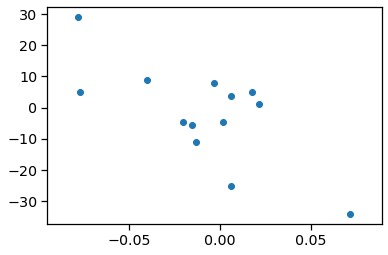

In [660]:
f1 = '$\Delta$Cadence'; f2 = '$\Delta$OPUS'
# f1 = '$\Delta$Steps'; f2 = '$\Delta$OPUS'
Fdiff2 = pd.concat((Fdiff[f1],Fdiff[f2]), axis=1)
plt.scatter(Fdiff[f1], Fdiff[f2])
Fdiff2.corr()

# Old analysis 

-0.648892996623 -0.963645553031 -0.36694221503


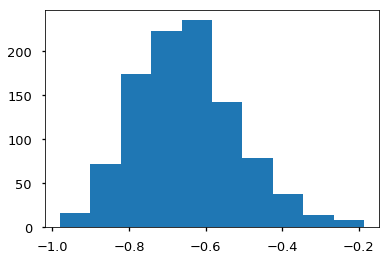

In [117]:
# #resample correlations to bootstrap 95%CI
# xyboot = []; r_boot =[]
# xy = Fdiff[['UsageFrac','Age']]
# for k in range(1000):
#     inds = np.random.choice(xy.index,len(xy.index)) #sample indices w replacement
#     vals = xy.iloc[inds].values
#     r = pearsonr(vals[:,0],vals[:,1]) #compute corr coefficient on bootstrap replica
#     r_boot.append(r[0]) #store corr coeff

# plt.hist(r_boot)
# mu = np.mean(r_boot)
# print(mu,np.percentile(r_boot,0.25),np.percentile(r_boot,97.5))

In [115]:
np.p

array([10,  0])

In [99]:
np.percentile(r_boot,97.5)

-0.33930873505146458

In [73]:
vals = xy.iloc[np.array([0,2,3])].values

In [112]:
x = Fdiff['Steps per Hour']
y = Fdiff['6mWT']
print(pearsonr(x,y))
x = Fdiff['UsageFrac']
y = Fdiff['6mWT']
print(pearsonr(x,y))
x = Fdiff['DTimeCommunity']
y = Fdiff['6mWT']
print(pearsonr(x,y))

x = Fdiff['Steps per Hour']
y = Fdiff['10mWTss']
print(pearsonr(x,y))
x = Fdiff['UsageFrac']
y = Fdiff['10mWTss']
print(pearsonr(x,y))
x = Fdiff['DTimeCommunity']
y = Fdiff['10mWTss']
print(pearsonr(x,y))

x = Fdiff['Steps per Hour']
y = Fdiff['OPUS']
print(pearsonr(x,y))
x = Fdiff['UsageFrac']
y = Fdiff['OPUS']
print(pearsonr(x,y))
x = Fdiff['DTimeCommunity']
y = Fdiff['OPUS']
print(pearsonr(x,y))

x = Fdiff['Steps per Hour']
y = Fdiff['Age']
print(pearsonr(x,y))
x = Fdiff['UsageFrac']
y = Fdiff['Age']
print(pearsonr(x,y))
x = Fdiff['BaselineYrs']
y = Fdiff['DTimeCommunity']
print(pearsonr(x,y))
x = Fdiff['BaselineYrs']
y = Fdiff['6mWT']
print(pearsonr(x,y))
x = Fdiff['UsageFrac']
y = Fdiff['OPUS']
print(pearsonr(x,y))

(-0.0093011021795821464, 0.97482525568656486)
(-0.083864255883296018, 0.77561566176742236)
(-0.083035445434608515, 0.77778223613865505)
(0.014836525038428475, 0.95985179379654972)
(-0.1875291440728305, 0.52088241697670723)
(0.15641246277816606, 0.59335308046377011)
(-0.42090976001189245, 0.13394439612967199)
(-0.1473328917394667, 0.61522434384588243)
(-0.082877155062630409, 0.7781961906151279)
(-0.57935986372789317, 0.029911599136684092)
(-0.64654414257528114, 0.01246763210757784)
(0.39729851678828448, 0.15952766045946445)
(-0.50617952475326855, 0.064766546479358228)
(-0.1473328917394667, 0.61522434384588243)


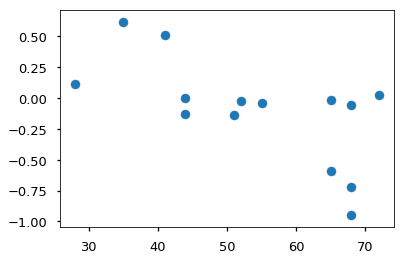

In [58]:
plt.scatter(Fdiff['Age'],Fdiff['UsageFrac'])

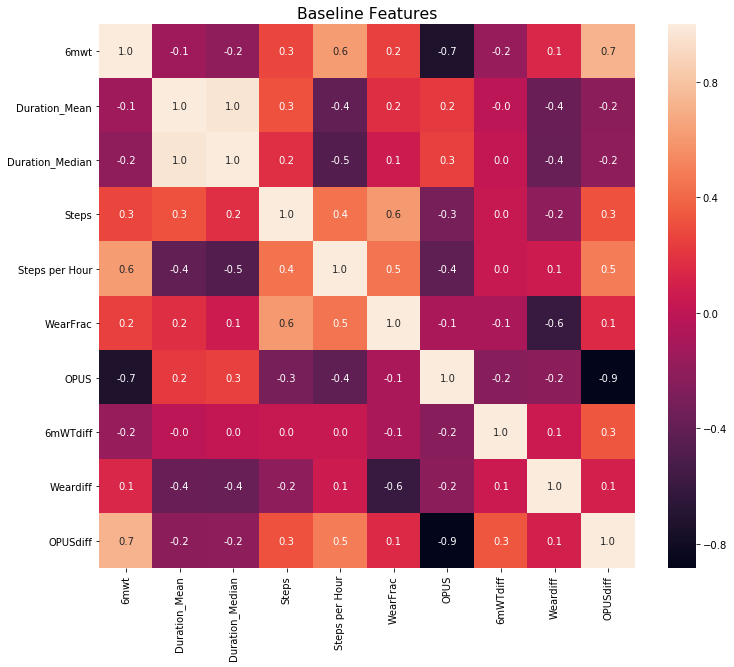

In [26]:
D = homedur[homedur['NewBrace']==0].drop('SubjID',axis=1)

D['6mWTdiff']=homedur.loc[homedur['NewBrace']==1,'6mwt'].values-homedur.loc[homedur['NewBrace']==0,'6mwt'].values
D['Weardiff']=homedur.loc[homedur['NewBrace']==1,'UsageFrac'].values-homedur.loc[homedur['NewBrace']==0,'UsageFrac'].values
D['OPUSdiff']=homedur.loc[homedur['NewBrace']==1,'OPUS'].values-homedur.loc[homedur['NewBrace']==0,'OPUS'].values

fcorr = D.drop('NewBrace',axis=1).corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=fcorr,annot=True,fmt='.1f')
sns.set_context('talk',font_scale=1)
plt.title('Baseline Features')

In [27]:
homeTemp = homedur[['NewBrace','SubjID','UsageFrac']].rename(columns={'UsageFrac':'HomeUsageFrac'})
Featsubj = pd.merge(left = Featsubj,right = homeTemp, how='inner', left_on = ['NewBrace','SubjID'], 
         right_on = ['NewBrace','SubjID'])

In [28]:
Featsubj.head()

,10mWTfast,10mWTss,6mWT,Age,BaselineYrs,Entropy,LocVar,MeanDistHome,MedianDur,MedianSpd,NewBrace,Nlocs,Npoints,Steps,Steps per Hour,SubjID,WearFrac,top2RelDur,OPUS,HomeWearFrac
0,0.85,0.69,231.93,65,60.0,2.061553,1.507332,0.107750,0.661944,1.015304,1,39,67,2.283582,13.478047,CBR21,0.033078,0.665099,44.79,0.019349
1,1.47,1.20,452.17,55,37.0,2.853499,-1.798453,0.021663,0.411111,0.921783,1,83,174,286.632184,386.364495,CBR30,0.938007,0.471777,39.93,0.360443
2,1.20,1.00,332.61,28,2.0,1.817652,-0.853575,0.022623,0.511111,0.828132,1,29,51,96.019608,222.484325,CBR22,0.845676,0.686630,47.52,0.847683
3,0.63,0.46,133.60,72,70.0,0.471462,-4.816799,0.007647,0.491389,2.330390,1,2,2,51.000000,100.778111,CBR27,1.000000,1.000000,41.51,0.004478
4,1.58,1.15,512.14,52,0.5,2.367757,-4.421965,0.005246,0.224167,0.658080,1,33,77,134.064935,361.052923,CBR26,0.974758,0.506524,69.12,0.050284


## Cbrace vs Baseline features

In [29]:
#** Regression Analysis **
# from scipy import stats
# features = ['Nlocs','LocVar','MedianDur','MedianSpd','Entropy','6mWT','10mWTss','UsageFrac']
# outcome = ['UsageFrac']

# for f in features:
#     x = Featsubj[Featsubj['NewBrace']==0][f]
#     y = Featsubj[Featsubj['NewBrace']==1][f]
#     x-y
#     slope, intercept, r_value, p_value, std_err = stats.linregress(x.values.astype('float32'),(y.values-x.values).astype('float32'))
#     print(f, slope,intercept,p_value)
#     plt.figure(figsize=(8,6))
#     sns.regplot(x.astype('float32'),(y.values-x.values).astype('float32'))

In [30]:
Featsubj

NameError: name 'Featsubj' is not defined

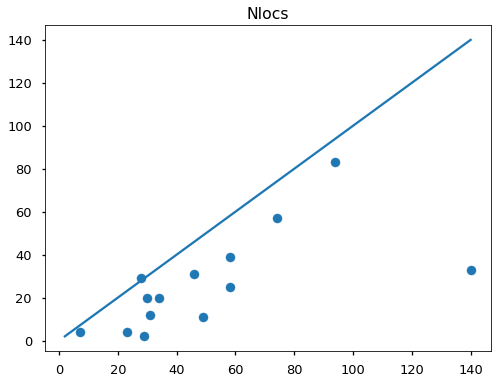

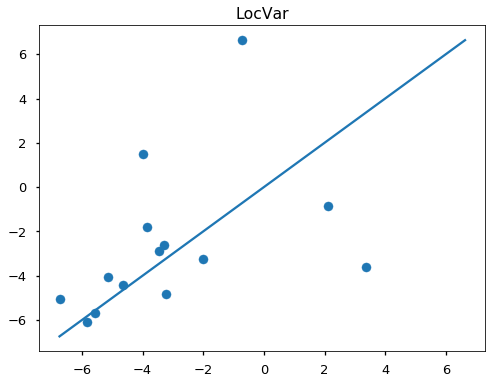

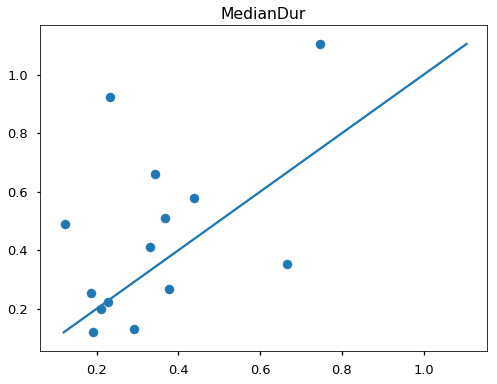

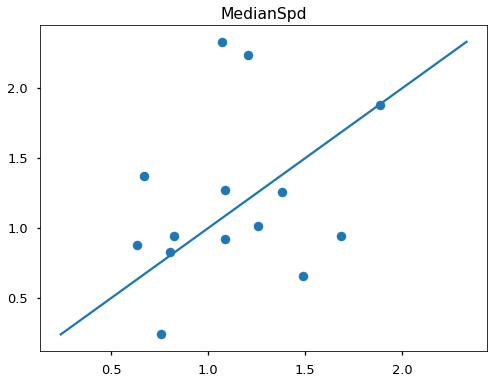

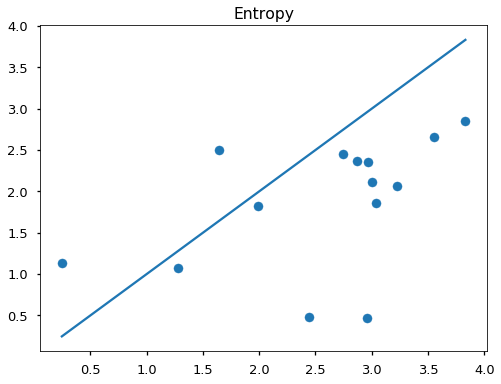

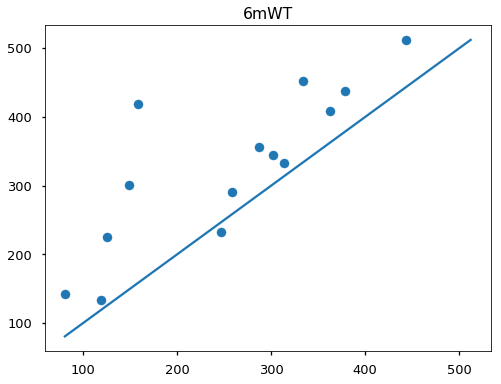

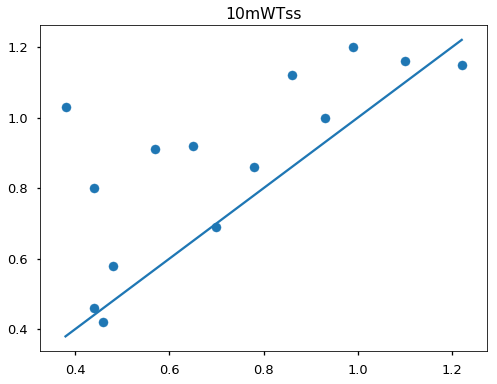

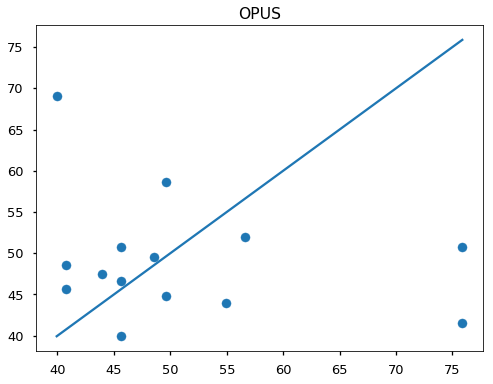

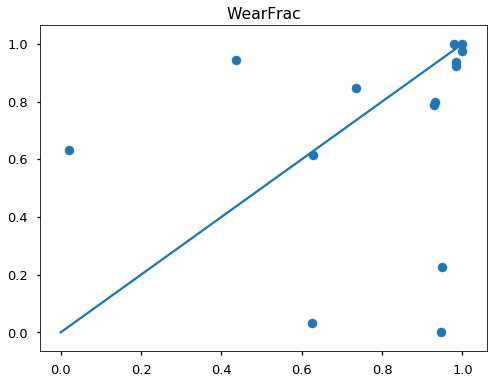

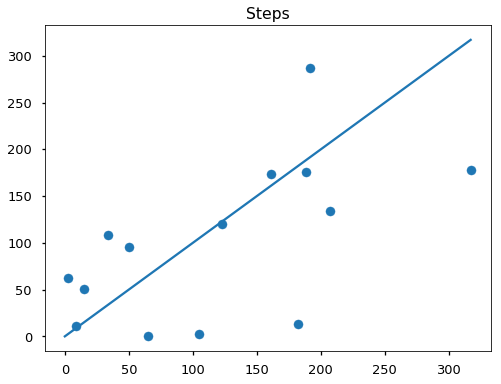

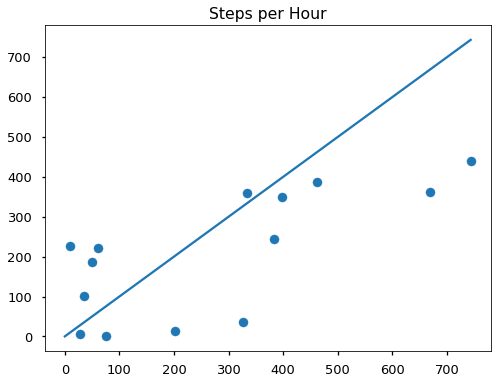

In [31]:
features = ['Nlocs','LocVar','MedianDur','MedianSpd','Entropy','6mWT','10mWTss','OPUS','UsageFrac', 'Steps', 'Steps per Hour']
outcome = ['UsageFrac']

for f in features:
    x = Featsubj[Featsubj['NewBrace']==0][f]
    y = Featsubj[Featsubj['NewBrace']==1][f]
    plt.figure(figsize=(8,6))
    plt.scatter(x,y)    
    mx=min(x)
    my=min(y)
    m = min(mx,my)
    Mx=max(x)
    My=max(y)
    M =max(Mx,My)
    plt.plot([m,M],[m,M])
    plt.title(f)
    if f == 'MeanDistHome':
        plt.xlim([-10,200])
        plt.ylim([-10,200])
    
    


In [249]:
# #shapiro test for normality - sanity check
# for i in range(1,4):
#     n = 10**i
#     x = np.random.randn(n)
#     y = np.random.randn(n)
#     fstat,pval = shapiro(x-y)
#     print(n,fstat,pval)

In [248]:
# #normality test
# from scipy.stats import ttest_rel, shapiro

# for f in features:
#     x = Featsubj[Featsubj['NewBrace']==0][f]
#     y = Featsubj[Featsubj['NewBrace']==1][f]
#     fstat,pval = shapiro(x)
#     print(f,tstat,pval)

## t-test / non-parametric comparisons between baseline and cbrace features

In [250]:
# #paired t-test
# from scipy.stats import ttest_rel, shapiro
# for f in features:
#     x = Featsubj[Featsubj['NewBrace']==0][f]
#     y = Featsubj[Featsubj['NewBrace']==1][f]
#     tstat,prob = ttest_rel(x,y)
#     print(f,tstat,prob)
    


In [32]:
from scipy.stats import wilcoxon
for f in features:
    x = Featsubj[Featsubj['NewBrace']==0][f]
    y = Featsubj[Featsubj['NewBrace']==1][f]
    tstat,prob = wilcoxon(x,y)
    print(f,tstat,prob)


Nlocs 1.0 0.0012114149768
LocVar 43.0 0.550923682773
MedianDur 32.0 0.198122911754
MedianSpd 48.0 0.777564616857
Entropy 13.0 0.0131503642343
6mWT 2.0 0.00152327574137
10mWTss 10.0 0.00763041473925
OPUS 51.0 0.924978307121
WearFrac 28.0 0.221330082994
Steps 43.0 0.550923682773
Steps per Hour 33.0 0.220898890668
